In [1]:
# ML Characterization

# TRAINED MODEL
# Training Set Prediction
# Validation Set Prediction
# Test Set Prediction
# Bulk Prediction

# RECONSTRUCTED MODEL
# Training Set Prediction
# Validation Set Prediction
# Test Set Prediction
# Bulk Prediction


################################################
## INITIALIZE PYTHON
################################################

import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
import scipy.io  
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from timeit import default_timer as timer

%matplotlib inline
np.random.seed(1)

# TESTS

from termcolor import colored
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dense

################################################
## PHYSICAL CONSTANTS
################################################

degrees         = np.pi/180;
meters          = 1;
centimeters     = 1e-2 * meters;
millimmeters    = 1e-3 * meters;
micrometers     = 1e-6 * meters;
nanometers      = 1e-9 * meters;
inches          = 2.54 * centimeters;
feet            = 12 * inches;
seconds         = 1;
hertz           = 1/seconds;
kilohertz       = 1e3 * hertz;
megahertz       = 1e6 * hertz;
gigahertz       = 1e9 * hertz;
terahertz       = 1e12 * hertz;
petahertz       = 1e15 * hertz;

# CONSTANTS
e0 = 8.85418782e-12 * 1/meters;
u0 = 1.25663706e-6 * 1/meters;
N0 = np.sqrt(u0/e0);
c0 = 299792458 * meters/seconds;


# SOURCE PARAMETERS
NFREQ   = 100;
freq1   = 1* gigahertz;
freq2   = 5 * gigahertz;
FREQ    = np.arange(freq1, freq2, (freq2 - freq1)/NFREQ);

FREQ = np.array([FREQ])
print(FREQ.shape)

print(tf.__version__)

print('1: ', tf.config.list_physical_devices('GPU'))
print('2: ', tf.test.is_built_with_cuda)
print('3: ', tf.test.gpu_device_name())
print('4: ', tf.config.get_visible_devices())


(1, 100)
2.5.0
1:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2:  <function is_built_with_cuda at 0x0000015467C09DC0>
3:  /device:GPU:0
4:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
################################################
## LOAD ENTIRE DATASETS
################################################
# Setclock
start = timer()

# def load_spectrum_dataset():
# Load the Dataset
train_dataset  = h5py.File('Responses_2450.h5', 'r')

# Extract the keys
keys           = list(train_dataset.keys())

# Separate the Materials and Spectrum Response Data
material       = train_dataset[keys[0]]
spectrum       = train_dataset[keys[1]]

# Get individual keys for materials and spectrum
keys_mat       = list(material.keys())
keys_spec      = list(spectrum.keys())

print(keys_mat)
print(keys_spec)

# Separate the components of material group
DEV_ER_mat     = material[keys_mat[0]]
DEV_SIG_mat    = material[keys_mat[1]]

# Separate the components of the spectrum group
A_spec         = spectrum[keys_spec[0]]
C_spec         = spectrum[keys_spec[1]]
R_spec         = spectrum[keys_spec[2]]
T_spec         = spectrum[keys_spec[3]]


# Testing for the accessibility of the data in the spectrum group
#print(A_spec['1'][:].reshape(1,100).squeeze())
#print(C_spec['1'][:].reshape(1,100).squeeze())
#print(R_spec['1'][:].reshape(1,100).squeeze())
#print(T_spec['1'][:].reshape(1,100).squeeze())
DEV_ER_mat_x = DEV_ER_mat['1'][:].reshape(128,128,1).shape[0]
DEV_ER_mat_y = DEV_ER_mat['1'][:].reshape(128,128,1).shape[1]

# Retriving a list for the total number of samples (HDF5 groups cannot be indexed easily)
sub_keys_spectrum = list(A_spec.keys())
spec_index        = [int(x) for x in sub_keys_spectrum]
#print(sorted(spec_index))
#print(len(spec_index))

# Prepare for the numpy data containers
DEV_ER    = np.zeros([len(spec_index), 128, 128, 1])
DEV_SIG   = np.zeros([len(spec_index), 128, 128, 1])
REF       = np.zeros([len(spec_index), 100])
TRN       = np.zeros([len(spec_index), 100])
ABS       = np.zeros([len(spec_index), 100])
CON       = np.zeros([len(spec_index), 100])

# Create a for loop to fill the numpy data containers from the HDF5 file containers

for i in range(len(spec_index)):
    DEV_ER[i, :, :,:]       = DEV_ER_mat[str(i)][:].reshape([DEV_ER_mat_x, DEV_ER_mat_y, 1])
    DEV_SIG[i, :, :,:]      = DEV_SIG_mat[str(i)][:].reshape([DEV_ER_mat_x, DEV_ER_mat_y, 1])
    REF[i, :]               = R_spec[str(i)][:].reshape(1,R_spec['1'][:].shape[0]).squeeze()
    TRN[i, :]               = T_spec[str(i)][:].reshape(1,T_spec['1'][:].shape[0]).squeeze()
    ABS[i, :]               = A_spec[str(i)][:].reshape(1,A_spec['1'][:].shape[0]).squeeze()
    CON[i, :]               = C_spec[str(i)][:].reshape(1,C_spec['1'][:].shape[0]).squeeze()
    
#return DEV_ER, DEV_SIG, REF, TRN, ABS, CON

print(REF[:].shape)
print(DEV_ER[:].shape)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

['DevER', 'DevSIG']
['A', 'C', 'R', 'T']
(2450, 100)
(2450, 128, 128, 1)
Number of seconds elapsed: 5.529796700000134 seconds
Number of minutes elapsed: 0.09216327833333555 minutes
Number of hours elapsed: 0.001536054638888926 hours


C:\Users\admin\AppData\Local\Temp\ipykernel_44016\3290326882.py:55: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);


<Figure size 432x288 with 0 Axes>

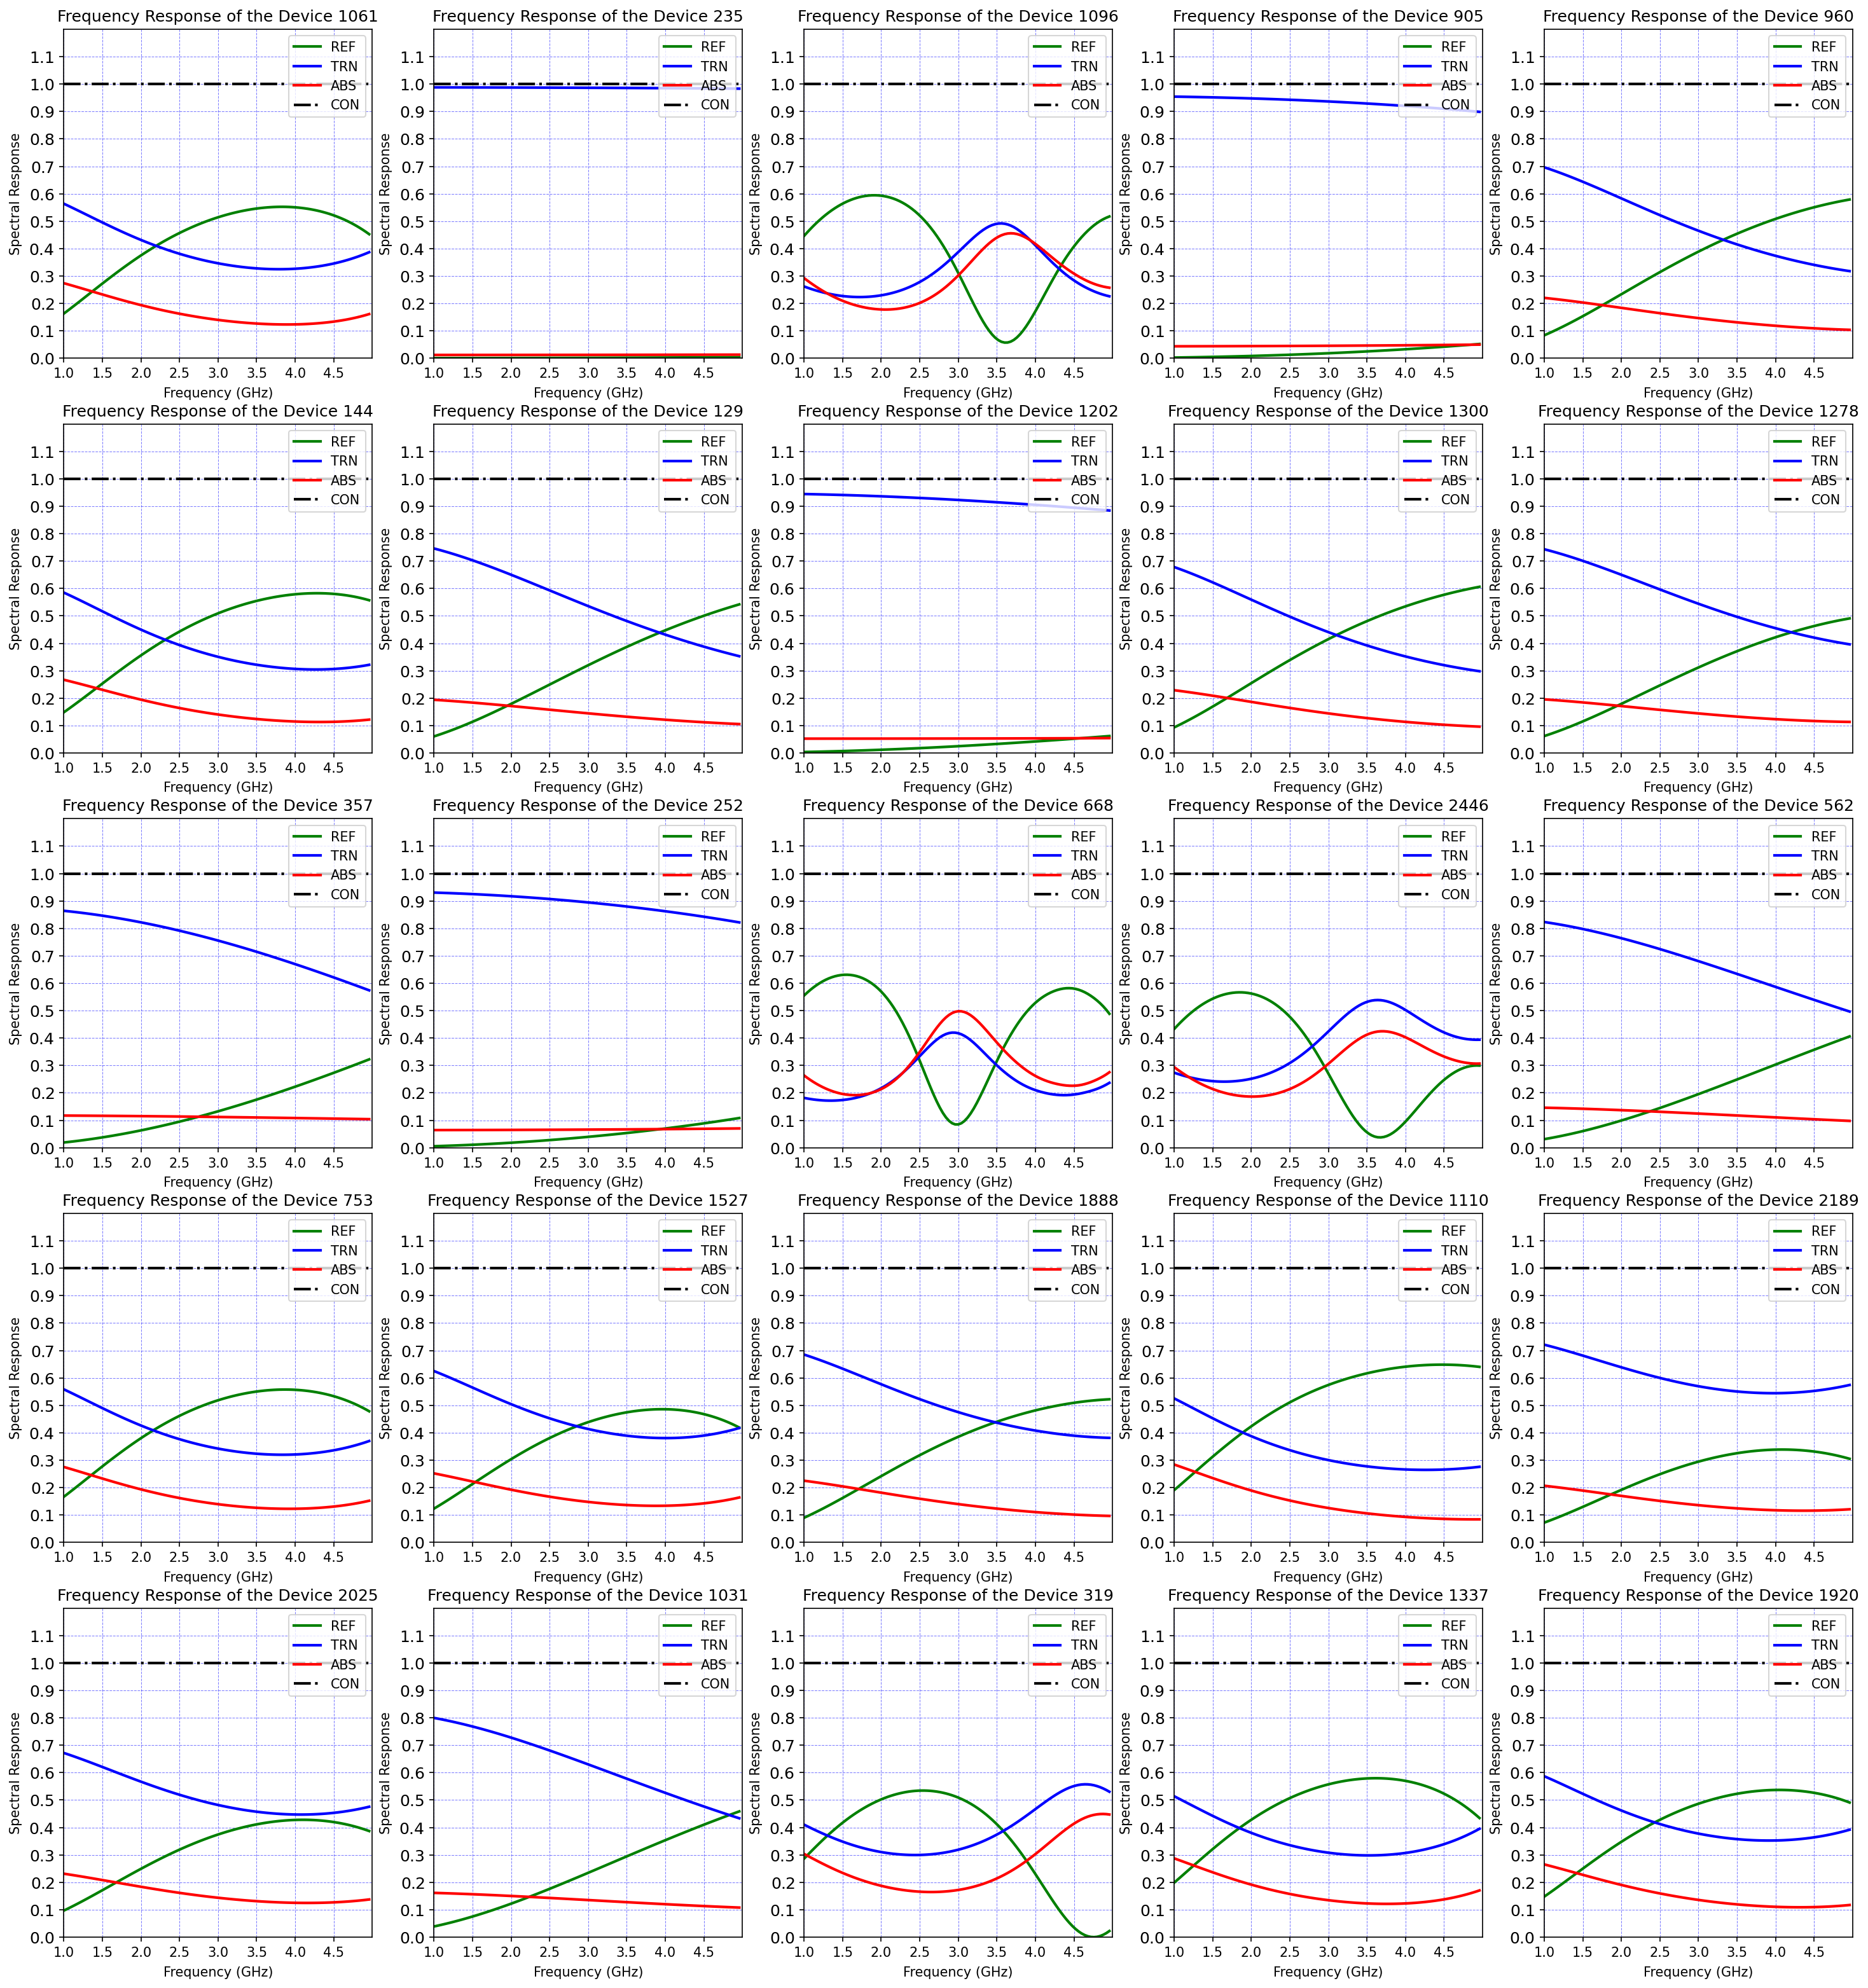

In [3]:
################################################
## PLOTTING PARAMETERS - TRAINING SET
################################################
# Setclock
start = timer()

plot_row    = 5
plot_column = 5

#subplots with confiugrable rows and columns, figure size and dots per inch
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row , ncols = plot_column, figsize = (25,25), dpi = 150, constrained_layout=True) 

imageIndex_list = []

for x_plot in range(plot_row):
  for y_plot in range(plot_column):

    #imageIndex = x_plot*(plot_row + y_plot)
    imageIndex = np.random.randint(len(spec_index))

    #Axis number spacing
    plt.rcParams['xtick.major.pad']=5
    plt.rcParams['ytick.major.pad']=5

    #Setting colors, linewidths, linetypes
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, REF[imageIndex,:], color ='green'   , lw=2,  ls='-', label = 'REF')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, TRN[imageIndex,:], color ='blue'  , lw=2,  ls='-', label = 'TRN')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, ABS[imageIndex,:], color ='red' , lw=2,  ls='-', label = 'ABS')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, CON[imageIndex,:], color ='black' , lw=2,  ls='-.', label = 'CON')

    #Axis label spacing
    axes[x_plot, y_plot].xaxis.labelpad = 5
    axes[x_plot, y_plot].yaxis.labelpad = 5

    #Legends, labels, and title
    axes[x_plot, y_plot].set_xlabel('Frequency (GHz)')
    axes[x_plot, y_plot].set_ylabel('Spectral Response')
    axes[x_plot, y_plot].set_title('Frequency Response of the Device ' + str(imageIndex))
    axes[x_plot, y_plot].legend(loc=1)
 

    #Plot range
    axes[x_plot, y_plot].set_ylim([0,1.2])
    axes[x_plot, y_plot].set_xlim([1,5])

    #Placement of ticks and custom tick labels

    axes[x_plot, y_plot].set_xticks(list(np.arange(1,5,0.5)))
    yticks = list(np.arange(0,1.2,0.1))
    axes[x_plot, y_plot].set_yticks(yticks)
    axes[x_plot, y_plot].set_yticklabels(["$ %.1f $" % y for y in yticks], fontsize = 12)

    #Axis position adjustments
    fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);

    #Axis Grid
    axes[x_plot, y_plot].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    
    #Labels, Splines, and Tick Color
    color_type = 'black'
    axes[x_plot, y_plot].spines['bottom'].set_color(color_type)
    axes[x_plot, y_plot].spines['top'].set_color(color_type)
    axes[x_plot, y_plot].spines['left'].set_color(color_type)
    axes[x_plot, y_plot].spines['right'].set_color(color_type)
    axes[x_plot, y_plot].xaxis.label.set_color(color_type)
    axes[x_plot, y_plot].yaxis.label.set_color(color_type)
    axes[x_plot, y_plot].tick_params(axis='x', colors=color_type)
    axes[x_plot, y_plot].tick_params(axis='y', colors=color_type)

    imageIndex_list.append(imageIndex)

plt.show()

print(imageIndex_list)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

[1061, 235, 1096, 905, 960, 144, 129, 1202, 1300, 1278, 357, 252, 668, 2446, 562, 753, 1527, 1888, 1110, 2189, 2025, 1031, 319, 1337, 1920]
Number of seconds elapsed: 2.2826632999999674 seconds
Number of minutes elapsed: 0.03804438833333279 minutes
Number of hours elapsed: 0.0006340731388888799 hours


<Figure size 432x288 with 0 Axes>

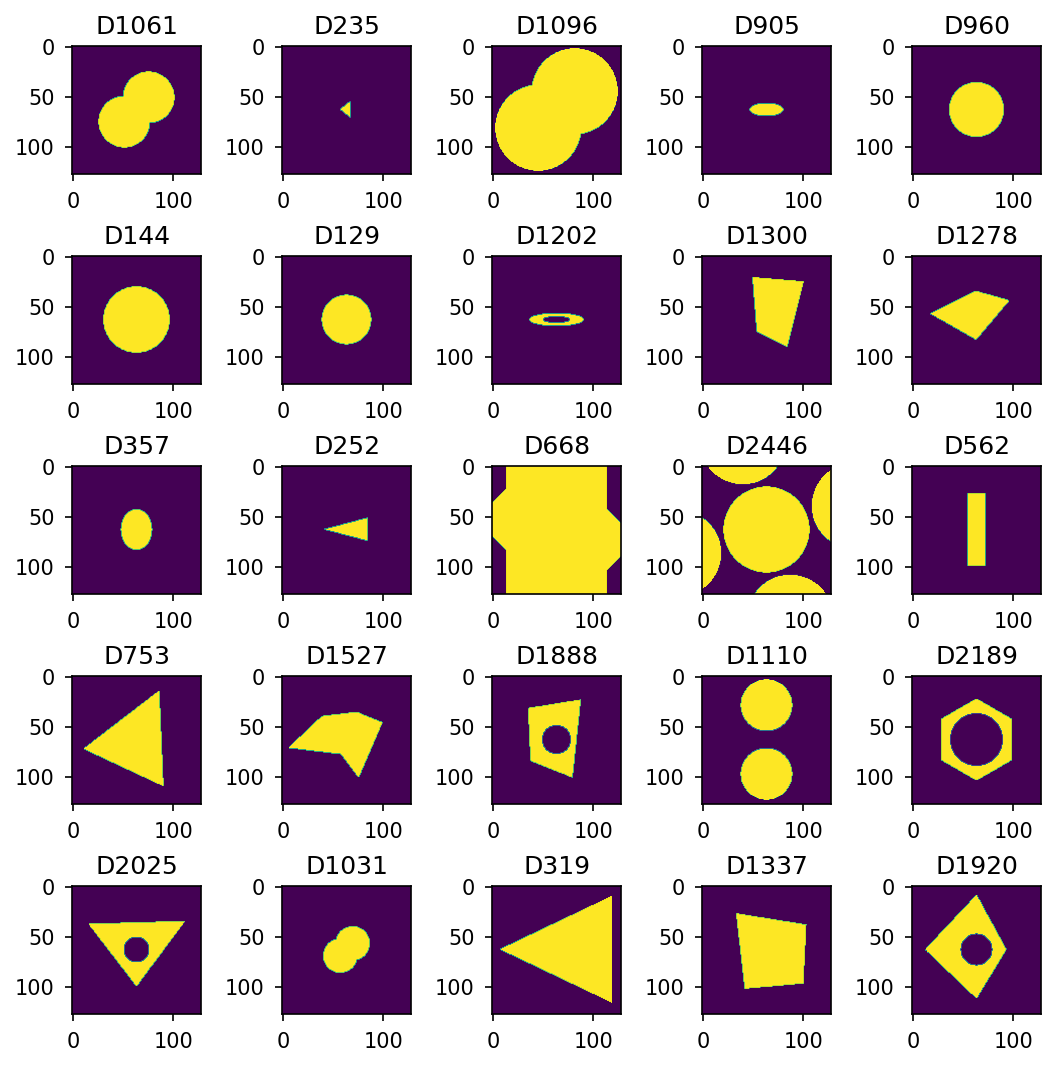

Number of seconds elapsed: 0.966053200000033 seconds
Number of minutes elapsed: 0.016100886666667216 minutes
Number of hours elapsed: 0.00026834811111112026 hours


In [4]:
################################################
## DISPLAY IMAGE
################################################

start = timer()

plot_row = 5
plot_column = 5
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row, ncols = plot_column, figsize = (7,7), dpi = 150, constrained_layout=True) 

counter_for_image = 0
for x_plot in range(plot_row):
  for y_plot in range(plot_column):
    #imageIndex = x_plot*(plot_row + y_plot)
    imageIndex = imageIndex_list[counter_for_image]
    axes[x_plot,y_plot].imshow(DEV_ER[imageIndex].reshape((DEV_ER.shape[1],DEV_ER.shape[1])).T) #display sample training image
    axes[x_plot,y_plot].set_title('D'+ str(imageIndex))
    counter_for_image += 1
plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

In [6]:
################################################
## ASSIGN TRAINING SET DATA
################################################

start = timer()

import random
# Shuffling of the data pairs
data_indices = list(np.sort(spec_index))
#print(data_indices)
shuffled_indices = random.sample(data_indices,len(data_indices))
#print(shuffled_indices)

# Data Splitting
trainPercentage = int(0.90*len(spec_index))
testPercentage = int(0.10*len(spec_index))

print("Number of Training Samples" + str(trainPercentage))
print("Number of Validation Samples" + str(testPercentage))

list_choice = shuffled_indices

DEV_ER_TRAIN    = DEV_ER[list_choice[0:trainPercentage]][:]  
DEV_ER_VAL      = DEV_ER[list_choice[trainPercentage+1:trainPercentage+testPercentage]][:]

TRN_TRAIN       = TRN[list_choice[0:trainPercentage]][:]  
TRN_VAL         = TRN[list_choice[trainPercentage+1:trainPercentage+testPercentage]][:]
    
print(DEV_ER_TRAIN[:].shape)
print(DEV_ER_VAL[:].shape)

print(TRN_TRAIN[:].shape)
print(TRN_VAL[:].shape)

# Normalize image vectors
X_train = DEV_ER_TRAIN
X_val   = DEV_ER_VAL

# Reshape
Y_train = TRN_TRAIN
Y_val   = TRN_VAL


print ("number of training examples = " + str(X_train.shape[0]))
#print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_val shape: " + str(X_val.shape))
print ("Y_val shape: " + str(Y_val.shape))

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

Number of Training Samples2205
Number of Validation Samples245
(2205, 128, 128, 1)
(244, 128, 128, 1)
(2205, 100)
(244, 100)
number of training examples = 2205
X_train shape: (2205, 128, 128, 1)
Y_train shape: (2205, 100)
X_val shape: (244, 128, 128, 1)
Y_val shape: (244, 100)
Number of seconds elapsed: 0.06767019999983859 seconds
Number of minutes elapsed: 0.0011278366666639765 minutes
Number of hours elapsed: 1.879727777773294e-05 hours


In [7]:
################################################
## CREATE THE MACHINE LEARNING ALGORITHM
################################################

start = timer()

def SpectralModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 1
            tfl.InputLayer(input_shape = (128,128,1)),
            tfl.ZeroPadding2D(padding=3),
            ## Conv2D
            tfl.Conv2D(32, (3,3), strides = 1, activation = None, padding = 'same'),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis = 3),
            ## ReLU
            tfl.ReLU(),
            # Conv2D
            tfl.Conv2D(64, (3,3), strides = 1, activation = None, padding = 'valid'),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis = 3),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D
            tfl.MaxPooling2D(pool_size = 2, strides = 2),
            # Dropout
            tfl.Dropout(0.5),
            tfl.Conv2D(128, (3,3), strides = 1, activation = None, padding = 'valid'),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis = 3),
            ## ReLU
            tfl.ReLU(),
            # Conv2D
            tfl.Conv2D(128, (3,3), strides = 1, activation = None, padding = 'valid'),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis = 3),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D
            tfl.MaxPooling2D(pool_size = 2, strides = 2),
            # Dropout
            tfl.Dropout(0.5),
            tfl.Conv2D(256, (3,3), strides = 1, activation = None, padding = 'valid'),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis = 3),
            ## ReLU
            tfl.ReLU(),
            # Conv2D
            tfl.Conv2D(256, (3,3), strides = 1, activation = None, padding = 'valid'),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis = 3),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D
            tfl.MaxPooling2D(pool_size = 2, strides = 2),
            # Dropout
            tfl.Dropout(0.5),
            tfl.Conv2D(512, (3,3), strides = 1, activation = None, padding = 'valid'),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis = 3),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D
            tfl.MaxPooling2D(pool_size = 2, strides = 2),
            # Dropout
            tfl.Dropout(0.5),
            ## Flatten layer
            tfl.Flatten(),
            tfl.Dense(units = 4096, activation = None),
            tfl.ReLU(),
            tfl.Dropout(0.5),
            tfl.Dense(units = 2048, activation = None),
            tfl.ReLU(),
            tfl.Dropout(0.5),
            tfl.Dense(units = 1024, activation = None),
            tfl.ReLU(),
            tfl.Dropout(0.5),
            tfl.Dense(units = 512, activation = None),
            tfl.ReLU(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tfl.Dense(units = 100, activation = 'sigmoid')
            # YOUR CODE STARTS HERE
            # YOUR CODE ENDS HERE
        ])
    return model

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

Number of seconds elapsed: 0.00015549999989161734 seconds
Number of minutes elapsed: 2.591666664860289e-06 minutes
Number of hours elapsed: 4.319444441433815e-08 hours


In [8]:
################################################
## MODEL SUMMARY
################################################

start = timer()

Spectral_Model = SpectralModel()

def summary(model):
    model.compile(optimizer='adam',
                  loss='mean_square_error',
                  metrics=['accuracy'])
    result = []
    for layer in model.layers:
        descriptors = [layer.__class__.__name__, layer.output_shape, layer.count_params()]
        if (type(layer) == Conv2D):
            descriptors.append(layer.padding)
            descriptors.append(layer.activation.__name__)
            descriptors.append(layer.kernel_initializer.__class__.__name__)
        if (type(layer) == MaxPooling2D):
            descriptors.append(layer.pool_size)
            descriptors.append(layer.strides)
            descriptors.append(layer.padding)
        if (type(layer) == Dropout):
            descriptors.append(layer.rate)
        if (type(layer) == ZeroPadding2D):
            descriptors.append(layer.padding)
        if (type(layer) == Dense):
            descriptors.append(layer.activation.__name__)
        result.append(descriptors)
    return result

# Print a summary for each layer
for layer in summary(Spectral_Model):
    print(layer)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

['ZeroPadding2D', (None, 134, 134, 1), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 134, 134, 32), 320, 'same', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 134, 134, 32), 128]
['ReLU', (None, 134, 134, 32), 0]
['Conv2D', (None, 132, 132, 64), 18496, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 132, 132, 64), 256]
['ReLU', (None, 132, 132, 64), 0]
['MaxPooling2D', (None, 66, 66, 64), 0, (2, 2), (2, 2), 'valid']
['Dropout', (None, 66, 66, 64), 0, 0.5]
['Conv2D', (None, 64, 64, 128), 73856, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 128), 512]
['ReLU', (None, 64, 64, 128), 0]
['Conv2D', (None, 62, 62, 128), 147584, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 62, 62, 128), 512]
['ReLU', (None, 62, 62, 128), 0]
['MaxPooling2D', (None, 31, 31, 128), 0, (2, 2), (2, 2), 'valid']
['Dropout', (None, 31, 31, 128), 0, 0.5]
['Conv2D', (None, 29, 29, 256), 295168, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization

In [9]:
################################################
## COMPILE THE MODEL
################################################

start = timer()

Spectral_Model.compile(optimizer='adam',
                   loss='mean_squared_error',
                   metrics=['accuracy'])

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

Number of seconds elapsed: 0.0022625999999945634 seconds
Number of minutes elapsed: 3.770999999990939e-05 minutes
Number of hours elapsed: 6.284999999984898e-07 hours


In [10]:
Spectral_Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 134, 134, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 134, 134, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 134, 134, 32)      128       
_________________________________________________________________
re_lu (ReLU)                 (None, 134, 134, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 132, 132, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 132, 132, 64)      256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 132, 132, 64)      0

In [11]:
################################################
## MODEL TRAINING
################################################
start = timer()
SM = Spectral_Model.fit(X_train, Y_train, epochs=3500, batch_size=64)
end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60//60) + " hours")

Epoch 1/2500
35/35 [==============================] - 12s 136ms/step - loss: 0.0869 - accuracy: 0.0435
Epoch 2/2500
35/35 [==============================] - 4s 108ms/step - loss: 0.0167 - accuracy: 0.0376
Epoch 3/2500
35/35 [==============================] - 4s 109ms/step - loss: 0.0105 - accuracy: 0.0884
Epoch 4/2500
35/35 [==============================] - 4s 111ms/step - loss: 0.0069 - accuracy: 0.1478
Epoch 5/2500
35/35 [==============================] - 4s 112ms/step - loss: 0.0054 - accuracy: 0.1787
Epoch 6/2500
35/35 [==============================] - 4s 115ms/step - loss: 0.0051 - accuracy: 0.1909
Epoch 7/2500
35/35 [==============================] - 4s 110ms/step - loss: 0.0049 - accuracy: 0.1819
Epoch 8/2500
35/35 [==============================] - 4s 110ms/step - loss: 0.0040 - accuracy: 0.2063
Epoch 9/2500
35/35 [==============================] - 4s 112ms/step - loss: 0.0040 - accuracy: 0.2082
Epoch 10/2500
35/35 [==============================] - 4s 108ms/step - loss: 0.00

35/35 [==============================] - 4s 111ms/step - loss: 0.0012 - accuracy: 0.5052
Epoch 81/2500
35/35 [==============================] - 4s 110ms/step - loss: 0.0013 - accuracy: 0.5206
Epoch 82/2500
35/35 [==============================] - 4s 110ms/step - loss: 0.0012 - accuracy: 0.5134
Epoch 83/2500
35/35 [==============================] - 4s 111ms/step - loss: 0.0012 - accuracy: 0.5288
Epoch 84/2500
35/35 [==============================] - 4s 110ms/step - loss: 0.0013 - accuracy: 0.5374
Epoch 85/2500
35/35 [==============================] - 4s 110ms/step - loss: 0.0013 - accuracy: 0.5274
Epoch 86/2500
35/35 [==============================] - 4s 110ms/step - loss: 0.0012 - accuracy: 0.5288
Epoch 87/2500
35/35 [==============================] - 4s 111ms/step - loss: 0.0015 - accuracy: 0.5170
Epoch 88/2500
35/35 [==============================] - 4s 112ms/step - loss: 0.0013 - accuracy: 0.5175
Epoch 89/2500
35/35 [==============================] - 4s 110ms/step - loss: 0.0012 - a

35/35 [==============================] - 4s 108ms/step - loss: 9.3827e-04 - accuracy: 0.6295
Epoch 159/2500
35/35 [==============================] - 4s 108ms/step - loss: 9.3117e-04 - accuracy: 0.6222
Epoch 160/2500
35/35 [==============================] - 4s 108ms/step - loss: 8.8786e-04 - accuracy: 0.6381
Epoch 161/2500
35/35 [==============================] - 4s 108ms/step - loss: 9.0056e-04 - accuracy: 0.6426
Epoch 162/2500
35/35 [==============================] - 4s 108ms/step - loss: 9.0964e-04 - accuracy: 0.6322
Epoch 163/2500
35/35 [==============================] - 4s 108ms/step - loss: 9.0960e-04 - accuracy: 0.6349
Epoch 164/2500
35/35 [==============================] - 4s 108ms/step - loss: 8.1301e-04 - accuracy: 0.6349
Epoch 165/2500
35/35 [==============================] - 4s 108ms/step - loss: 8.5363e-04 - accuracy: 0.6222
Epoch 166/2500
35/35 [==============================] - 4s 108ms/step - loss: 0.0011 - accuracy: 0.6163
Epoch 167/2500
35/35 [=========================

35/35 [==============================] - 4s 108ms/step - loss: 7.3540e-04 - accuracy: 0.6658
Epoch 235/2500
35/35 [==============================] - 4s 108ms/step - loss: 7.3319e-04 - accuracy: 0.6871
Epoch 236/2500
35/35 [==============================] - 4s 108ms/step - loss: 6.7918e-04 - accuracy: 0.6653
Epoch 237/2500
35/35 [==============================] - 4s 108ms/step - loss: 6.8932e-04 - accuracy: 0.6930
Epoch 238/2500
35/35 [==============================] - 4s 108ms/step - loss: 6.7950e-04 - accuracy: 0.6871
Epoch 239/2500
35/35 [==============================] - 4s 108ms/step - loss: 6.6361e-04 - accuracy: 0.6472
Epoch 240/2500
35/35 [==============================] - 4s 108ms/step - loss: 7.6046e-04 - accuracy: 0.6748
Epoch 241/2500
35/35 [==============================] - 4s 108ms/step - loss: 7.1744e-04 - accuracy: 0.6562
Epoch 242/2500
35/35 [==============================] - 4s 108ms/step - loss: 6.9675e-04 - accuracy: 0.6639
Epoch 243/2500
35/35 [=====================

Epoch 310/2500
35/35 [==============================] - 4s 108ms/step - loss: 6.2803e-04 - accuracy: 0.6762
Epoch 311/2500
35/35 [==============================] - 4s 108ms/step - loss: 6.0728e-04 - accuracy: 0.6789
Epoch 312/2500
35/35 [==============================] - 4s 108ms/step - loss: 5.8403e-04 - accuracy: 0.6621
Epoch 313/2500
35/35 [==============================] - 4s 108ms/step - loss: 5.4202e-04 - accuracy: 0.6943
Epoch 314/2500
35/35 [==============================] - 4s 108ms/step - loss: 5.8764e-04 - accuracy: 0.6776
Epoch 315/2500
35/35 [==============================] - 4s 108ms/step - loss: 6.2095e-04 - accuracy: 0.6667
Epoch 316/2500
35/35 [==============================] - 4s 108ms/step - loss: 7.3004e-04 - accuracy: 0.6649
Epoch 317/2500
35/35 [==============================] - 4s 108ms/step - loss: 6.0432e-04 - accuracy: 0.6562
Epoch 318/2500
35/35 [==============================] - 4s 108ms/step - loss: 5.7094e-04 - accuracy: 0.6907
Epoch 319/2500
35/35 [======

35/35 [==============================] - 4s 108ms/step - loss: 5.1244e-04 - accuracy: 0.6957
Epoch 386/2500
35/35 [==============================] - 4s 108ms/step - loss: 5.2659e-04 - accuracy: 0.7020
Epoch 387/2500
35/35 [==============================] - 4s 108ms/step - loss: 5.3527e-04 - accuracy: 0.7093
Epoch 388/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.8281e-04 - accuracy: 0.7152
Epoch 389/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.8020e-04 - accuracy: 0.7138
Epoch 390/2500
35/35 [==============================] - 4s 108ms/step - loss: 5.0897e-04 - accuracy: 0.7066
Epoch 391/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.9635e-04 - accuracy: 0.7120
Epoch 392/2500
35/35 [==============================] - 4s 108ms/step - loss: 5.4218e-04 - accuracy: 0.7138
Epoch 393/2500
35/35 [==============================] - 4s 109ms/step - loss: 4.4495e-04 - accuracy: 0.7070
Epoch 394/2500
35/35 [=====================

Epoch 461/2500
35/35 [==============================] - 4s 108ms/step - loss: 5.2318e-04 - accuracy: 0.7664
Epoch 462/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.8354e-04 - accuracy: 0.7696
Epoch 463/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.7387e-04 - accuracy: 0.7583
Epoch 464/2500
35/35 [==============================] - 4s 108ms/step - loss: 5.4849e-04 - accuracy: 0.7832
Epoch 465/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.9339e-04 - accuracy: 0.7846
Epoch 466/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.7652e-04 - accuracy: 0.7855
Epoch 467/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.9025e-04 - accuracy: 0.7696
Epoch 468/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.8315e-04 - accuracy: 0.7755
Epoch 469/2500
35/35 [==============================] - 4s 108ms/step - loss: 5.0379e-04 - accuracy: 0.7850
Epoch 470/2500
35/35 [======

35/35 [==============================] - 4s 108ms/step - loss: 4.1938e-04 - accuracy: 0.7819
Epoch 537/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.2667e-04 - accuracy: 0.7959
Epoch 538/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.4207e-04 - accuracy: 0.7864
Epoch 539/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.0445e-04 - accuracy: 0.7891
Epoch 540/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.2545e-04 - accuracy: 0.7891
Epoch 541/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.2532e-04 - accuracy: 0.7905
Epoch 542/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.2079e-04 - accuracy: 0.7805
Epoch 543/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.1018e-04 - accuracy: 0.7868
Epoch 544/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.1865e-04 - accuracy: 0.7896
Epoch 545/2500
35/35 [=====================

Epoch 612/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.0403e-04 - accuracy: 0.7968
Epoch 613/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.6533e-04 - accuracy: 0.7927
Epoch 614/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.0361e-04 - accuracy: 0.7891
Epoch 615/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.1697e-04 - accuracy: 0.7810
Epoch 616/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.2979e-04 - accuracy: 0.7937
Epoch 617/2500
35/35 [==============================] - 4s 108ms/step - loss: 3.6835e-04 - accuracy: 0.8009
Epoch 618/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.1679e-04 - accuracy: 0.7927
Epoch 619/2500
35/35 [==============================] - 4s 108ms/step - loss: 3.8872e-04 - accuracy: 0.7927
Epoch 620/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.0772e-04 - accuracy: 0.7873
Epoch 621/2500
35/35 [======

35/35 [==============================] - 4s 108ms/step - loss: 3.7400e-04 - accuracy: 0.8005
Epoch 688/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.0679e-04 - accuracy: 0.7909
Epoch 689/2500
35/35 [==============================] - 4s 108ms/step - loss: 3.7043e-04 - accuracy: 0.7918
Epoch 690/2500
35/35 [==============================] - 4s 108ms/step - loss: 3.9306e-04 - accuracy: 0.7950
Epoch 691/2500
35/35 [==============================] - 4s 108ms/step - loss: 3.9290e-04 - accuracy: 0.7909
Epoch 692/2500
35/35 [==============================] - 4s 108ms/step - loss: 3.8906e-04 - accuracy: 0.7950
Epoch 693/2500
35/35 [==============================] - 4s 108ms/step - loss: 3.6627e-04 - accuracy: 0.7932
Epoch 694/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.1798e-04 - accuracy: 0.7909
Epoch 695/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.3123e-04 - accuracy: 0.7941
Epoch 696/2500
35/35 [=====================

Epoch 763/2500
35/35 [==============================] - 4s 109ms/step - loss: 3.7863e-04 - accuracy: 0.7959
Epoch 764/2500
35/35 [==============================] - 4s 109ms/step - loss: 3.3719e-04 - accuracy: 0.7986
Epoch 765/2500
35/35 [==============================] - 4s 107ms/step - loss: 3.5812e-04 - accuracy: 0.8054
Epoch 766/2500
35/35 [==============================] - 4s 108ms/step - loss: 4.0603e-04 - accuracy: 0.7986
Epoch 767/2500
35/35 [==============================] - 4s 108ms/step - loss: 3.9334e-04 - accuracy: 0.8009
Epoch 768/2500
35/35 [==============================] - 4s 108ms/step - loss: 3.6026e-04 - accuracy: 0.7959
Epoch 769/2500
35/35 [==============================] - 4s 108ms/step - loss: 3.9890e-04 - accuracy: 0.7955
Epoch 770/2500
35/35 [==============================] - 4s 108ms/step - loss: 3.7263e-04 - accuracy: 0.7941
Epoch 771/2500
35/35 [==============================] - 4s 112ms/step - loss: 3.8290e-04 - accuracy: 0.7905
Epoch 772/2500
35/35 [======

35/35 [==============================] - 4s 115ms/step - loss: 3.1162e-04 - accuracy: 0.8041
Epoch 839/2500
35/35 [==============================] - 4s 114ms/step - loss: 3.4154e-04 - accuracy: 0.8050
Epoch 840/2500
35/35 [==============================] - 4s 115ms/step - loss: 3.3005e-04 - accuracy: 0.8032
Epoch 841/2500
35/35 [==============================] - 4s 115ms/step - loss: 3.2693e-04 - accuracy: 0.7964
Epoch 842/2500
35/35 [==============================] - 4s 115ms/step - loss: 3.4702e-04 - accuracy: 0.7955
Epoch 843/2500
35/35 [==============================] - 4s 114ms/step - loss: 3.3712e-04 - accuracy: 0.7946
Epoch 844/2500
35/35 [==============================] - 4s 114ms/step - loss: 3.4400e-04 - accuracy: 0.7959
Epoch 845/2500
35/35 [==============================] - 4s 123ms/step - loss: 3.5516e-04 - accuracy: 0.7991
Epoch 846/2500
35/35 [==============================] - 4s 121ms/step - loss: 3.3013e-04 - accuracy: 0.8041
Epoch 847/2500
35/35 [=====================

Epoch 914/2500
35/35 [==============================] - 4s 113ms/step - loss: 3.0780e-04 - accuracy: 0.7932
Epoch 915/2500
35/35 [==============================] - 4s 113ms/step - loss: 3.2901e-04 - accuracy: 0.7982
Epoch 916/2500
35/35 [==============================] - 4s 113ms/step - loss: 3.0164e-04 - accuracy: 0.7995
Epoch 917/2500
35/35 [==============================] - 4s 113ms/step - loss: 3.0082e-04 - accuracy: 0.8041
Epoch 918/2500
35/35 [==============================] - 4s 113ms/step - loss: 3.1664e-04 - accuracy: 0.8045
Epoch 919/2500
35/35 [==============================] - 4s 113ms/step - loss: 3.1164e-04 - accuracy: 0.7941
Epoch 920/2500
35/35 [==============================] - 4s 113ms/step - loss: 3.4931e-04 - accuracy: 0.8027
Epoch 921/2500
35/35 [==============================] - 4s 113ms/step - loss: 3.3719e-04 - accuracy: 0.7937
Epoch 922/2500
35/35 [==============================] - 4s 113ms/step - loss: 3.3103e-04 - accuracy: 0.7927
Epoch 923/2500
35/35 [======

35/35 [==============================] - 4s 115ms/step - loss: 3.1669e-04 - accuracy: 0.7982
Epoch 990/2500
35/35 [==============================] - 4s 116ms/step - loss: 3.1577e-04 - accuracy: 0.8005
Epoch 991/2500
35/35 [==============================] - 4s 116ms/step - loss: 2.9919e-04 - accuracy: 0.8023
Epoch 992/2500
35/35 [==============================] - 4s 114ms/step - loss: 3.0461e-04 - accuracy: 0.8063
Epoch 993/2500
35/35 [==============================] - 4s 115ms/step - loss: 3.3881e-04 - accuracy: 0.7918
Epoch 994/2500
35/35 [==============================] - 4s 114ms/step - loss: 3.3975e-04 - accuracy: 0.7995
Epoch 995/2500
35/35 [==============================] - 4s 115ms/step - loss: 3.5767e-04 - accuracy: 0.7973
Epoch 996/2500
35/35 [==============================] - 4s 115ms/step - loss: 3.0714e-04 - accuracy: 0.8059
Epoch 997/2500
35/35 [==============================] - 4s 115ms/step - loss: 3.1861e-04 - accuracy: 0.8068
Epoch 998/2500
35/35 [=====================

35/35 [==============================] - 4s 115ms/step - loss: 2.7814e-04 - accuracy: 0.8073
Epoch 1065/2500
35/35 [==============================] - 4s 115ms/step - loss: 2.8373e-04 - accuracy: 0.8086
Epoch 1066/2500
35/35 [==============================] - 4s 114ms/step - loss: 2.7308e-04 - accuracy: 0.8068
Epoch 1067/2500
35/35 [==============================] - 4s 114ms/step - loss: 2.7016e-04 - accuracy: 0.8145
Epoch 1068/2500
35/35 [==============================] - 4s 114ms/step - loss: 2.8174e-04 - accuracy: 0.8100
Epoch 1069/2500
35/35 [==============================] - 4s 114ms/step - loss: 2.8662e-04 - accuracy: 0.8145
Epoch 1070/2500
35/35 [==============================] - 4s 114ms/step - loss: 2.8554e-04 - accuracy: 0.8068
Epoch 1071/2500
35/35 [==============================] - 4s 114ms/step - loss: 2.8144e-04 - accuracy: 0.8018
Epoch 1072/2500
35/35 [==============================] - 4s 114ms/step - loss: 2.8520e-04 - accuracy: 0.8059
Epoch 1073/2500
35/35 [============

35/35 [==============================] - 4s 114ms/step - loss: 2.7093e-04 - accuracy: 0.8109
Epoch 1140/2500
35/35 [==============================] - 4s 115ms/step - loss: 2.7843e-04 - accuracy: 0.8118
Epoch 1141/2500
35/35 [==============================] - 4s 115ms/step - loss: 2.5982e-04 - accuracy: 0.8027
Epoch 1142/2500
35/35 [==============================] - 4s 114ms/step - loss: 2.5758e-04 - accuracy: 0.8050
Epoch 1143/2500
35/35 [==============================] - 4s 114ms/step - loss: 2.7277e-04 - accuracy: 0.8150
Epoch 1144/2500
35/35 [==============================] - 4s 114ms/step - loss: 2.6422e-04 - accuracy: 0.8132
Epoch 1145/2500
35/35 [==============================] - 4s 114ms/step - loss: 2.6737e-04 - accuracy: 0.8059
Epoch 1146/2500
35/35 [==============================] - 4s 114ms/step - loss: 2.6776e-04 - accuracy: 0.8082
Epoch 1147/2500
35/35 [==============================] - 4s 114ms/step - loss: 2.6480e-04 - accuracy: 0.8091
Epoch 1148/2500
35/35 [============

Epoch 1214/2500
35/35 [==============================] - 4s 114ms/step - loss: 2.5647e-04 - accuracy: 0.8068
Epoch 1215/2500
35/35 [==============================] - 4s 114ms/step - loss: 2.5984e-04 - accuracy: 0.8104
Epoch 1216/2500
35/35 [==============================] - 4s 113ms/step - loss: 2.5341e-04 - accuracy: 0.8068
Epoch 1217/2500
35/35 [==============================] - 4s 114ms/step - loss: 2.5751e-04 - accuracy: 0.8027
Epoch 1218/2500
35/35 [==============================] - 4s 113ms/step - loss: 2.7161e-04 - accuracy: 0.8054
Epoch 1219/2500
35/35 [==============================] - 4s 113ms/step - loss: 2.6809e-04 - accuracy: 0.8036
Epoch 1220/2500
35/35 [==============================] - 4s 113ms/step - loss: 2.5728e-04 - accuracy: 0.8073
Epoch 1221/2500
35/35 [==============================] - 4s 113ms/step - loss: 2.6139e-04 - accuracy: 0.8082
Epoch 1222/2500
35/35 [==============================] - 4s 114ms/step - loss: 2.5017e-04 - accuracy: 0.8059
Epoch 1223/2500
35/

35/35 [==============================] - 4s 112ms/step - loss: 2.4618e-04 - accuracy: 0.8163
Epoch 1290/2500
35/35 [==============================] - 4s 112ms/step - loss: 2.3098e-04 - accuracy: 0.8109
Epoch 1291/2500
35/35 [==============================] - 4s 112ms/step - loss: 2.3904e-04 - accuracy: 0.8091
Epoch 1292/2500
35/35 [==============================] - 4s 113ms/step - loss: 2.5408e-04 - accuracy: 0.8159
Epoch 1293/2500
35/35 [==============================] - 4s 112ms/step - loss: 2.6310e-04 - accuracy: 0.8113
Epoch 1294/2500
35/35 [==============================] - 4s 112ms/step - loss: 2.6093e-04 - accuracy: 0.8009
Epoch 1295/2500
35/35 [==============================] - 4s 113ms/step - loss: 2.5757e-04 - accuracy: 0.8100
Epoch 1296/2500
35/35 [==============================] - 4s 113ms/step - loss: 2.7252e-04 - accuracy: 0.8082
Epoch 1297/2500
35/35 [==============================] - 4s 113ms/step - loss: 2.6890e-04 - accuracy: 0.8077
Epoch 1298/2500
35/35 [============

35/35 [==============================] - 4s 122ms/step - loss: 2.4644e-04 - accuracy: 0.8127
Epoch 1365/2500
35/35 [==============================] - 4s 123ms/step - loss: 2.6174e-04 - accuracy: 0.8054
Epoch 1366/2500
35/35 [==============================] - 4s 122ms/step - loss: 2.5467e-04 - accuracy: 0.8073
Epoch 1367/2500
35/35 [==============================] - 4s 124ms/step - loss: 2.5829e-04 - accuracy: 0.8018
Epoch 1368/2500
35/35 [==============================] - 4s 122ms/step - loss: 2.3631e-04 - accuracy: 0.8100
Epoch 1369/2500
35/35 [==============================] - 4s 123ms/step - loss: 2.3856e-04 - accuracy: 0.8118
Epoch 1370/2500
35/35 [==============================] - 4s 121ms/step - loss: 2.3933e-04 - accuracy: 0.8213
Epoch 1371/2500
35/35 [==============================] - 4s 122ms/step - loss: 2.5776e-04 - accuracy: 0.8104
Epoch 1372/2500
35/35 [==============================] - 4s 122ms/step - loss: 2.6807e-04 - accuracy: 0.8073
Epoch 1373/2500
35/35 [============

35/35 [==============================] - 4s 120ms/step - loss: 2.2714e-04 - accuracy: 0.8018
Epoch 1440/2500
35/35 [==============================] - 4s 121ms/step - loss: 2.3349e-04 - accuracy: 0.8136
Epoch 1441/2500
35/35 [==============================] - 4s 121ms/step - loss: 2.3113e-04 - accuracy: 0.8054
Epoch 1442/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.3155e-04 - accuracy: 0.8036
Epoch 1443/2500
35/35 [==============================] - 4s 121ms/step - loss: 2.4371e-04 - accuracy: 0.8109
Epoch 1444/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.4181e-04 - accuracy: 0.8159
Epoch 1445/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.3493e-04 - accuracy: 0.8104
Epoch 1446/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.3816e-04 - accuracy: 0.8091
Epoch 1447/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.2307e-04 - accuracy: 0.8145
Epoch 1448/2500
35/35 [============

35/35 [==============================] - 4s 121ms/step - loss: 2.3774e-04 - accuracy: 0.8195
Epoch 1515/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.3652e-04 - accuracy: 0.8068
Epoch 1516/2500
35/35 [==============================] - 4s 121ms/step - loss: 2.2754e-04 - accuracy: 0.8054
Epoch 1517/2500
35/35 [==============================] - 4s 121ms/step - loss: 2.2826e-04 - accuracy: 0.8118
Epoch 1518/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.2700e-04 - accuracy: 0.8068
Epoch 1519/2500
35/35 [==============================] - 4s 121ms/step - loss: 2.3074e-04 - accuracy: 0.8240
Epoch 1520/2500
35/35 [==============================] - 4s 119ms/step - loss: 2.3985e-04 - accuracy: 0.8127
Epoch 1521/2500
35/35 [==============================] - 4s 121ms/step - loss: 2.3104e-04 - accuracy: 0.8163
Epoch 1522/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.3118e-04 - accuracy: 0.8181
Epoch 1523/2500
35/35 [============

35/35 [==============================] - 4s 121ms/step - loss: 4.7156e-04 - accuracy: 0.7909
Epoch 1590/2500
35/35 [==============================] - 4s 121ms/step - loss: 2.7824e-04 - accuracy: 0.7973
Epoch 1591/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.5691e-04 - accuracy: 0.8150
Epoch 1592/2500
35/35 [==============================] - 4s 122ms/step - loss: 2.5839e-04 - accuracy: 0.8014
Epoch 1593/2500
35/35 [==============================] - 4s 123ms/step - loss: 2.6708e-04 - accuracy: 0.8095
Epoch 1594/2500
35/35 [==============================] - 4s 122ms/step - loss: 2.4187e-04 - accuracy: 0.8132
Epoch 1595/2500
35/35 [==============================] - 4s 122ms/step - loss: 2.3514e-04 - accuracy: 0.8113
Epoch 1596/2500
35/35 [==============================] - 4s 122ms/step - loss: 2.2849e-04 - accuracy: 0.8068
Epoch 1597/2500
35/35 [==============================] - 4s 122ms/step - loss: 2.1959e-04 - accuracy: 0.8132
Epoch 1598/2500
35/35 [============

35/35 [==============================] - 4s 120ms/step - loss: 2.4169e-04 - accuracy: 0.8077
Epoch 1665/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.2217e-04 - accuracy: 0.8150
Epoch 1666/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.1712e-04 - accuracy: 0.8181
Epoch 1667/2500
35/35 [==============================] - 4s 120ms/step - loss: 3.0737e-04 - accuracy: 0.8045
Epoch 1668/2500
35/35 [==============================] - 4s 122ms/step - loss: 2.6190e-04 - accuracy: 0.7968
Epoch 1669/2500
35/35 [==============================] - 4s 122ms/step - loss: 2.5062e-04 - accuracy: 0.8095
Epoch 1670/2500
35/35 [==============================] - 4s 122ms/step - loss: 2.2711e-04 - accuracy: 0.7991
Epoch 1671/2500
35/35 [==============================] - 4s 122ms/step - loss: 2.6450e-04 - accuracy: 0.8213
Epoch 1672/2500
35/35 [==============================] - 4s 121ms/step - loss: 2.2386e-04 - accuracy: 0.8068
Epoch 1673/2500
35/35 [============

35/35 [==============================] - 4s 121ms/step - loss: 2.1366e-04 - accuracy: 0.8091
Epoch 1740/2500
35/35 [==============================] - 4s 121ms/step - loss: 2.1618e-04 - accuracy: 0.8122
Epoch 1741/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.0359e-04 - accuracy: 0.8163
Epoch 1742/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.0453e-04 - accuracy: 0.8091
Epoch 1743/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.0461e-04 - accuracy: 0.8054
Epoch 1744/2500
35/35 [==============================] - 4s 119ms/step - loss: 2.1692e-04 - accuracy: 0.8159
Epoch 1745/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.1931e-04 - accuracy: 0.8063
Epoch 1746/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.1644e-04 - accuracy: 0.8122
Epoch 1747/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.0958e-04 - accuracy: 0.8222
Epoch 1748/2500
35/35 [============

35/35 [==============================] - 4s 121ms/step - loss: 2.0546e-04 - accuracy: 0.8127
Epoch 1815/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.1009e-04 - accuracy: 0.8181
Epoch 1816/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.1239e-04 - accuracy: 0.8073
Epoch 1817/2500
35/35 [==============================] - 4s 121ms/step - loss: 2.2304e-04 - accuracy: 0.8254
Epoch 1818/2500
35/35 [==============================] - 4s 121ms/step - loss: 2.1271e-04 - accuracy: 0.8118
Epoch 1819/2500
35/35 [==============================] - 4s 121ms/step - loss: 2.0823e-04 - accuracy: 0.8104
Epoch 1820/2500
35/35 [==============================] - 4s 120ms/step - loss: 7.1464e-04 - accuracy: 0.7900
Epoch 1821/2500
35/35 [==============================] - 4s 123ms/step - loss: 8.4449e-04 - accuracy: 0.7723
Epoch 1822/2500
35/35 [==============================] - 4s 121ms/step - loss: 5.1395e-04 - accuracy: 0.7959
Epoch 1823/2500
35/35 [============

35/35 [==============================] - 4s 123ms/step - loss: 1.9882e-04 - accuracy: 0.8240
Epoch 1890/2500
35/35 [==============================] - 4s 122ms/step - loss: 2.0365e-04 - accuracy: 0.8204
Epoch 1891/2500
35/35 [==============================] - 4s 123ms/step - loss: 2.1270e-04 - accuracy: 0.8222
Epoch 1892/2500
35/35 [==============================] - 4s 122ms/step - loss: 2.0083e-04 - accuracy: 0.8127
Epoch 1893/2500
35/35 [==============================] - 4s 123ms/step - loss: 2.2908e-04 - accuracy: 0.8113
Epoch 1894/2500
35/35 [==============================] - 4s 122ms/step - loss: 1.9696e-04 - accuracy: 0.8113
Epoch 1895/2500
35/35 [==============================] - 4s 123ms/step - loss: 2.1964e-04 - accuracy: 0.8163
Epoch 1896/2500
35/35 [==============================] - 4s 123ms/step - loss: 2.0702e-04 - accuracy: 0.8181
Epoch 1897/2500
35/35 [==============================] - 4s 122ms/step - loss: 1.8775e-04 - accuracy: 0.8249
Epoch 1898/2500
35/35 [============

35/35 [==============================] - 4s 121ms/step - loss: 1.9446e-04 - accuracy: 0.8190
Epoch 1965/2500
35/35 [==============================] - 4s 120ms/step - loss: 1.7398e-04 - accuracy: 0.8222
Epoch 1966/2500
35/35 [==============================] - 4s 121ms/step - loss: 1.9741e-04 - accuracy: 0.8249
Epoch 1967/2500
35/35 [==============================] - 4s 120ms/step - loss: 1.9547e-04 - accuracy: 0.8190
Epoch 1968/2500
35/35 [==============================] - 4s 120ms/step - loss: 1.8936e-04 - accuracy: 0.8249
Epoch 1969/2500
35/35 [==============================] - 4s 120ms/step - loss: 1.8906e-04 - accuracy: 0.8195
Epoch 1970/2500
35/35 [==============================] - 4s 121ms/step - loss: 2.0016e-04 - accuracy: 0.8277
Epoch 1971/2500
35/35 [==============================] - 4s 121ms/step - loss: 2.4329e-04 - accuracy: 0.8091
Epoch 1972/2500
35/35 [==============================] - 4s 120ms/step - loss: 2.1933e-04 - accuracy: 0.8200
Epoch 1973/2500
35/35 [============

35/35 [==============================] - 4s 123ms/step - loss: 1.9659e-04 - accuracy: 0.8245
Epoch 2040/2500
35/35 [==============================] - 4s 124ms/step - loss: 1.8536e-04 - accuracy: 0.8168
Epoch 2041/2500
35/35 [==============================] - 4s 123ms/step - loss: 2.1067e-04 - accuracy: 0.8118
Epoch 2042/2500
35/35 [==============================] - 4s 123ms/step - loss: 1.8839e-04 - accuracy: 0.8200
Epoch 2043/2500
35/35 [==============================] - 4s 126ms/step - loss: 1.8658e-04 - accuracy: 0.8204
Epoch 2044/2500
35/35 [==============================] - 4s 124ms/step - loss: 1.9031e-04 - accuracy: 0.8213
Epoch 2045/2500
35/35 [==============================] - 4s 125ms/step - loss: 1.8863e-04 - accuracy: 0.8259
Epoch 2046/2500
35/35 [==============================] - 4s 124ms/step - loss: 2.0314e-04 - accuracy: 0.8240
Epoch 2047/2500
35/35 [==============================] - 4s 125ms/step - loss: 1.9497e-04 - accuracy: 0.8222
Epoch 2048/2500
35/35 [============

35/35 [==============================] - 4s 123ms/step - loss: 1.9895e-04 - accuracy: 0.8240
Epoch 2115/2500
35/35 [==============================] - 4s 123ms/step - loss: 1.8199e-04 - accuracy: 0.8254
Epoch 2116/2500
35/35 [==============================] - 4s 125ms/step - loss: 1.8730e-04 - accuracy: 0.8358
Epoch 2117/2500
35/35 [==============================] - 4s 125ms/step - loss: 1.8451e-04 - accuracy: 0.8245
Epoch 2118/2500
35/35 [==============================] - 4s 124ms/step - loss: 1.8404e-04 - accuracy: 0.8200
Epoch 2119/2500
35/35 [==============================] - 4s 124ms/step - loss: 1.7972e-04 - accuracy: 0.8200
Epoch 2120/2500
35/35 [==============================] - 4s 123ms/step - loss: 1.8866e-04 - accuracy: 0.8168
Epoch 2121/2500
35/35 [==============================] - 4s 123ms/step - loss: 1.7819e-04 - accuracy: 0.8181
Epoch 2122/2500
35/35 [==============================] - 4s 124ms/step - loss: 1.8318e-04 - accuracy: 0.8272
Epoch 2123/2500
35/35 [============

35/35 [==============================] - 4s 122ms/step - loss: 1.7714e-04 - accuracy: 0.8204
Epoch 2190/2500
35/35 [==============================] - 4s 123ms/step - loss: 1.9020e-04 - accuracy: 0.8181
Epoch 2191/2500
35/35 [==============================] - 5s 131ms/step - loss: 1.8820e-04 - accuracy: 0.8154
Epoch 2192/2500
35/35 [==============================] - 5s 132ms/step - loss: 1.8502e-04 - accuracy: 0.8113
Epoch 2193/2500
35/35 [==============================] - 4s 128ms/step - loss: 1.9094e-04 - accuracy: 0.8172
Epoch 2194/2500
35/35 [==============================] - 4s 124ms/step - loss: 1.6246e-04 - accuracy: 0.8231
Epoch 2195/2500
35/35 [==============================] - 4s 124ms/step - loss: 1.7873e-04 - accuracy: 0.8190
Epoch 2196/2500
35/35 [==============================] - 4s 123ms/step - loss: 1.8043e-04 - accuracy: 0.8095
Epoch 2197/2500
35/35 [==============================] - 4s 123ms/step - loss: 1.6977e-04 - accuracy: 0.8259
Epoch 2198/2500
35/35 [============

35/35 [==============================] - 4s 123ms/step - loss: 1.8981e-04 - accuracy: 0.8154
Epoch 2265/2500
35/35 [==============================] - 4s 124ms/step - loss: 1.8288e-04 - accuracy: 0.8204
Epoch 2266/2500
35/35 [==============================] - 4s 125ms/step - loss: 1.8393e-04 - accuracy: 0.8304
Epoch 2267/2500
35/35 [==============================] - 4s 124ms/step - loss: 1.7474e-04 - accuracy: 0.8186
Epoch 2268/2500
35/35 [==============================] - 4s 123ms/step - loss: 1.6876e-04 - accuracy: 0.8249
Epoch 2269/2500
35/35 [==============================] - 4s 124ms/step - loss: 1.7001e-04 - accuracy: 0.8190
Epoch 2270/2500
35/35 [==============================] - 4s 122ms/step - loss: 1.7086e-04 - accuracy: 0.8209
Epoch 2271/2500
35/35 [==============================] - 4s 123ms/step - loss: 1.7714e-04 - accuracy: 0.8177
Epoch 2272/2500
35/35 [==============================] - 4s 123ms/step - loss: 1.8980e-04 - accuracy: 0.8150
Epoch 2273/2500
35/35 [============

35/35 [==============================] - 4s 123ms/step - loss: 1.7957e-04 - accuracy: 0.8127
Epoch 2340/2500
35/35 [==============================] - 4s 123ms/step - loss: 1.7304e-04 - accuracy: 0.8172
Epoch 2341/2500
35/35 [==============================] - 4s 122ms/step - loss: 2.0041e-04 - accuracy: 0.8118
Epoch 2342/2500
35/35 [==============================] - 4s 126ms/step - loss: 1.8985e-04 - accuracy: 0.8095
Epoch 2343/2500
35/35 [==============================] - 4s 122ms/step - loss: 1.7878e-04 - accuracy: 0.8249
Epoch 2344/2500
35/35 [==============================] - 4s 126ms/step - loss: 1.8390e-04 - accuracy: 0.8204
Epoch 2345/2500
35/35 [==============================] - 4s 125ms/step - loss: 1.8897e-04 - accuracy: 0.8236
Epoch 2346/2500
35/35 [==============================] - 4s 126ms/step - loss: 1.8277e-04 - accuracy: 0.8245
Epoch 2347/2500
35/35 [==============================] - 4s 128ms/step - loss: 1.6665e-04 - accuracy: 0.8195
Epoch 2348/2500
35/35 [============

35/35 [==============================] - 4s 119ms/step - loss: 1.6362e-04 - accuracy: 0.8218
Epoch 2415/2500
35/35 [==============================] - 4s 121ms/step - loss: 1.6302e-04 - accuracy: 0.8336
Epoch 2416/2500
35/35 [==============================] - 4s 118ms/step - loss: 1.6732e-04 - accuracy: 0.8136
Epoch 2417/2500
35/35 [==============================] - 4s 119ms/step - loss: 2.0999e-04 - accuracy: 0.8190
Epoch 2418/2500
35/35 [==============================] - 4s 118ms/step - loss: 2.4444e-04 - accuracy: 0.8032
Epoch 2419/2500
35/35 [==============================] - 4s 119ms/step - loss: 1.9878e-04 - accuracy: 0.8036
Epoch 2420/2500
35/35 [==============================] - 4s 118ms/step - loss: 1.9444e-04 - accuracy: 0.8118
Epoch 2421/2500
35/35 [==============================] - 4s 124ms/step - loss: 1.8439e-04 - accuracy: 0.8132
Epoch 2422/2500
35/35 [==============================] - 4s 124ms/step - loss: 1.8836e-04 - accuracy: 0.8186
Epoch 2423/2500
35/35 [============

35/35 [==============================] - 4s 122ms/step - loss: 1.8419e-04 - accuracy: 0.8177
Epoch 2490/2500
35/35 [==============================] - 4s 120ms/step - loss: 1.7011e-04 - accuracy: 0.8254
Epoch 2491/2500
35/35 [==============================] - 4s 122ms/step - loss: 1.6872e-04 - accuracy: 0.82132s -
Epoch 2492/2500
35/35 [==============================] - 6s 171ms/step - loss: 1.8270e-04 - accuracy: 0.8145
Epoch 2493/2500
35/35 [==============================] - 5s 149ms/step - loss: 1.6518e-04 - accuracy: 0.8259
Epoch 2494/2500
35/35 [==============================] - 6s 169ms/step - loss: 1.6389e-04 - accuracy: 0.8141
Epoch 2495/2500
35/35 [==============================] - 5s 128ms/step - loss: 1.7202e-04 - accuracy: 0.8190
Epoch 2496/2500
35/35 [==============================] - 6s 183ms/step - loss: 1.7923e-04 - accuracy: 0.8200
Epoch 2497/2500
35/35 [==============================] - 6s 188ms/step - loss: 1.7395e-04 - accuracy: 0.8163
Epoch 2498/2500
35/35 [========

In [206]:
################################################
## SAVE MODEL and IMPORT MODEL
################################################
from scipy import spatial
from numpy import dot
from numpy.linalg import norm


model_save = 0
if model_save:
    # Save the Model - Do this once the training result is satisfactory.
    Spectral_Model.save("Trained_TRN_model_v4")

    # Save the ML Architecture
    config = Spectral_Model.get_config()


# USE THIS ONCE DATA COLLECTION FROM TRAINED MODEL IS COMPLETE.
asserting_data_closeness = 0
model_import = 1
if model_import:
    tf.keras.backend.clear_session()
    # It can be used to reconstruct the model identically.
    reconstructed_model = tf.keras.models.load_model("Trained_TRN_model")
    # reconstructed_model = tf.saved_model.load("Trained_TRN_model_v3")
    # Let's check:

    start = timer()
    # Training Set
    reconstructed_model.fit(X_train, Y_train)
    # Test Set
    reconstructed_model.fit(X_test, Y_test)

    # Predictions
    reconstructed_model.predict(X_train)
    reconstructed_model.predict(X_test)

    end = timer()
    print("Number of seconds elapsed: " + str(end - start) + " seconds")
    print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
    print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

    Dat_A = Spectral_Model.predict(X_train)
    Dat_B = reconstructed_model.predict(X_train)
    cosSimScipy = []
    cosSimNumpy = []
    for item in range(Dat_A.shape[0]):
        # Solve for cosine similarity (scipy)
        cos_sim_scipy = 1 - spatial.distance.cosine(Dat_A[item], Dat_B[item])
        cosSimScipy.append(cos_sim_scipy)
        #print("Cosine Similarity using Scipy: " + str(cos_sim_scipy))

        # Solve for cosine similarity (numpy)
        cos_sim_numpy = dot(Dat_A[item], Dat_B[item])/(norm(Dat_A[item])*norm(Dat_B[item]))
        cosSimNumpy.append(cos_sim_numpy)
        #print("Cosine Similarity using Numpy: " + str(cos_sim_numpy))
        
    print("Average Cosine Similarity using Scipy: ")
    print(sum(cosSimScipy)/len(cosSimScipy))
    print("Average Cosine Similarity using Numpy: ")
    print(sum(cosSimNumpy)/len(cosSimNumpy))
    
    
    if asserting_data_closeness:
        np.testing.assert_allclose(
            Spectral_Model.predict(X_test), reconstructed_model.predict(X_test)
        )
    


42/42 [==============================] - 2s 58ms/step - loss: 1.4045e-04 - accuracy: 0.8405
Number of seconds elapsed: 9.246163699997851 seconds
Number of minutes elapsed: 0.15410272833329752 minutes
Number of hours elapsed: 0.0025683788055549587 hours
Average Cosine Similarity using Scipy: 
0.9989097930406496
Average Cosine Similarity using Numpy: 
0.9989097914998494


In [207]:
################################################
## TRAINING PROCESS CHARACTERIZATION
################################################
training_mode = 0

In [208]:
################################################
## EVALUATE TRAINING DATA SET
################################################

start = timer()

if training_mode:
    Predictions_train = Spectral_Model.evaluate(X_train, Y_train)
else: 
    Predictions_train = reconstructed_model.evaluate(X_train,Y_train)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

69/69 [==============================] - 1s 16ms/step - loss: 0.0012 - accuracy: 0.7823
Number of seconds elapsed: 1.5121747000011965 seconds
Number of minutes elapsed: 0.025202911666686607 minutes
Number of hours elapsed: 0.00042004852777811013 hours


In [209]:
################################################
## TESTING PREDICTIONS USING TRAINING SET
################################################

start = timer()

if training_mode:
    Predictions_train = Spectral_Model.predict(X_train)
else: 
    Predictions_train = reconstructed_model.predict(X_train)
print(Predictions_train[0])

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

[0.47880083 0.47299606 0.4671917  0.46139076 0.45560756 0.44984066
 0.4441316  0.43846425 0.43284568 0.4272996  0.42183328 0.41644797
 0.4111671  0.4059765  0.40086988 0.39590216 0.39104214 0.38627854
 0.38166288 0.3771662  0.37279496 0.36854628 0.3644425  0.36046627
 0.35661972 0.35293624 0.34936464 0.34595925 0.3426775  0.33955878
 0.33656138 0.3337311  0.3310261  0.3284829  0.32604638 0.32373536
 0.32156357 0.31951758 0.31761464 0.31579643 0.31413195 0.31259596
 0.31119132 0.3099384  0.3088191  0.30782485 0.30699536 0.30629703
 0.3057375  0.30532753 0.3050684  0.30495661 0.3049655  0.30517146
 0.30550596 0.30601633 0.30668274 0.30749983 0.30846632 0.3096127
 0.3108867  0.31232294 0.31392577 0.3156702  0.3175614  0.31961855
 0.32183772 0.32422835 0.32680783 0.32957432 0.33253202 0.33569977
 0.33909124 0.3427197  0.3466931  0.35077408 0.35503986 0.35961425
 0.36445805 0.36955935 0.3749283  0.3805477  0.38642418 0.3925733
 0.39895618 0.4055716  0.41241866 0.41945505 0.42667803 0.434024

In [210]:
################################################
## COSINE SIMILARITY
################################################
Dat_A = Predictions_train
Dat_B = TRN_TRAIN
cosSimScipy = []
cosSimNumpy = []
for item in range(Dat_A.shape[0]):
    # Solve for cosine similarity (scipy)
    cos_sim_scipy = 1 - spatial.distance.cosine(Dat_A[item], Dat_B[item])
    cosSimScipy.append(cos_sim_scipy)
    #print("Cosine Similarity using Scipy: " + str(cos_sim_scipy))

    # Solve for cosine similarity (numpy)
    cos_sim_numpy = dot(Dat_A[item], Dat_B[item])/(norm(Dat_A[item])*norm(Dat_B[item]))
    cosSimNumpy.append(cos_sim_numpy)
    #print("Cosine Similarity using Numpy: " + str(cos_sim_numpy))

print("Average Cosine Similarity using Scipy: ")
print(sum(cosSimScipy)/len(cosSimScipy))
print("Average Cosine Similarity using Numpy: ")
print(sum(cosSimNumpy)/len(cosSimNumpy))


Average Cosine Similarity using Scipy: 
0.9989574794335413
Average Cosine Similarity using Numpy: 
0.9989574782354268


C:\Users\admin\AppData\Local\Temp\ipykernel_44016\286740077.py:51: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);


<Figure size 432x288 with 0 Axes>

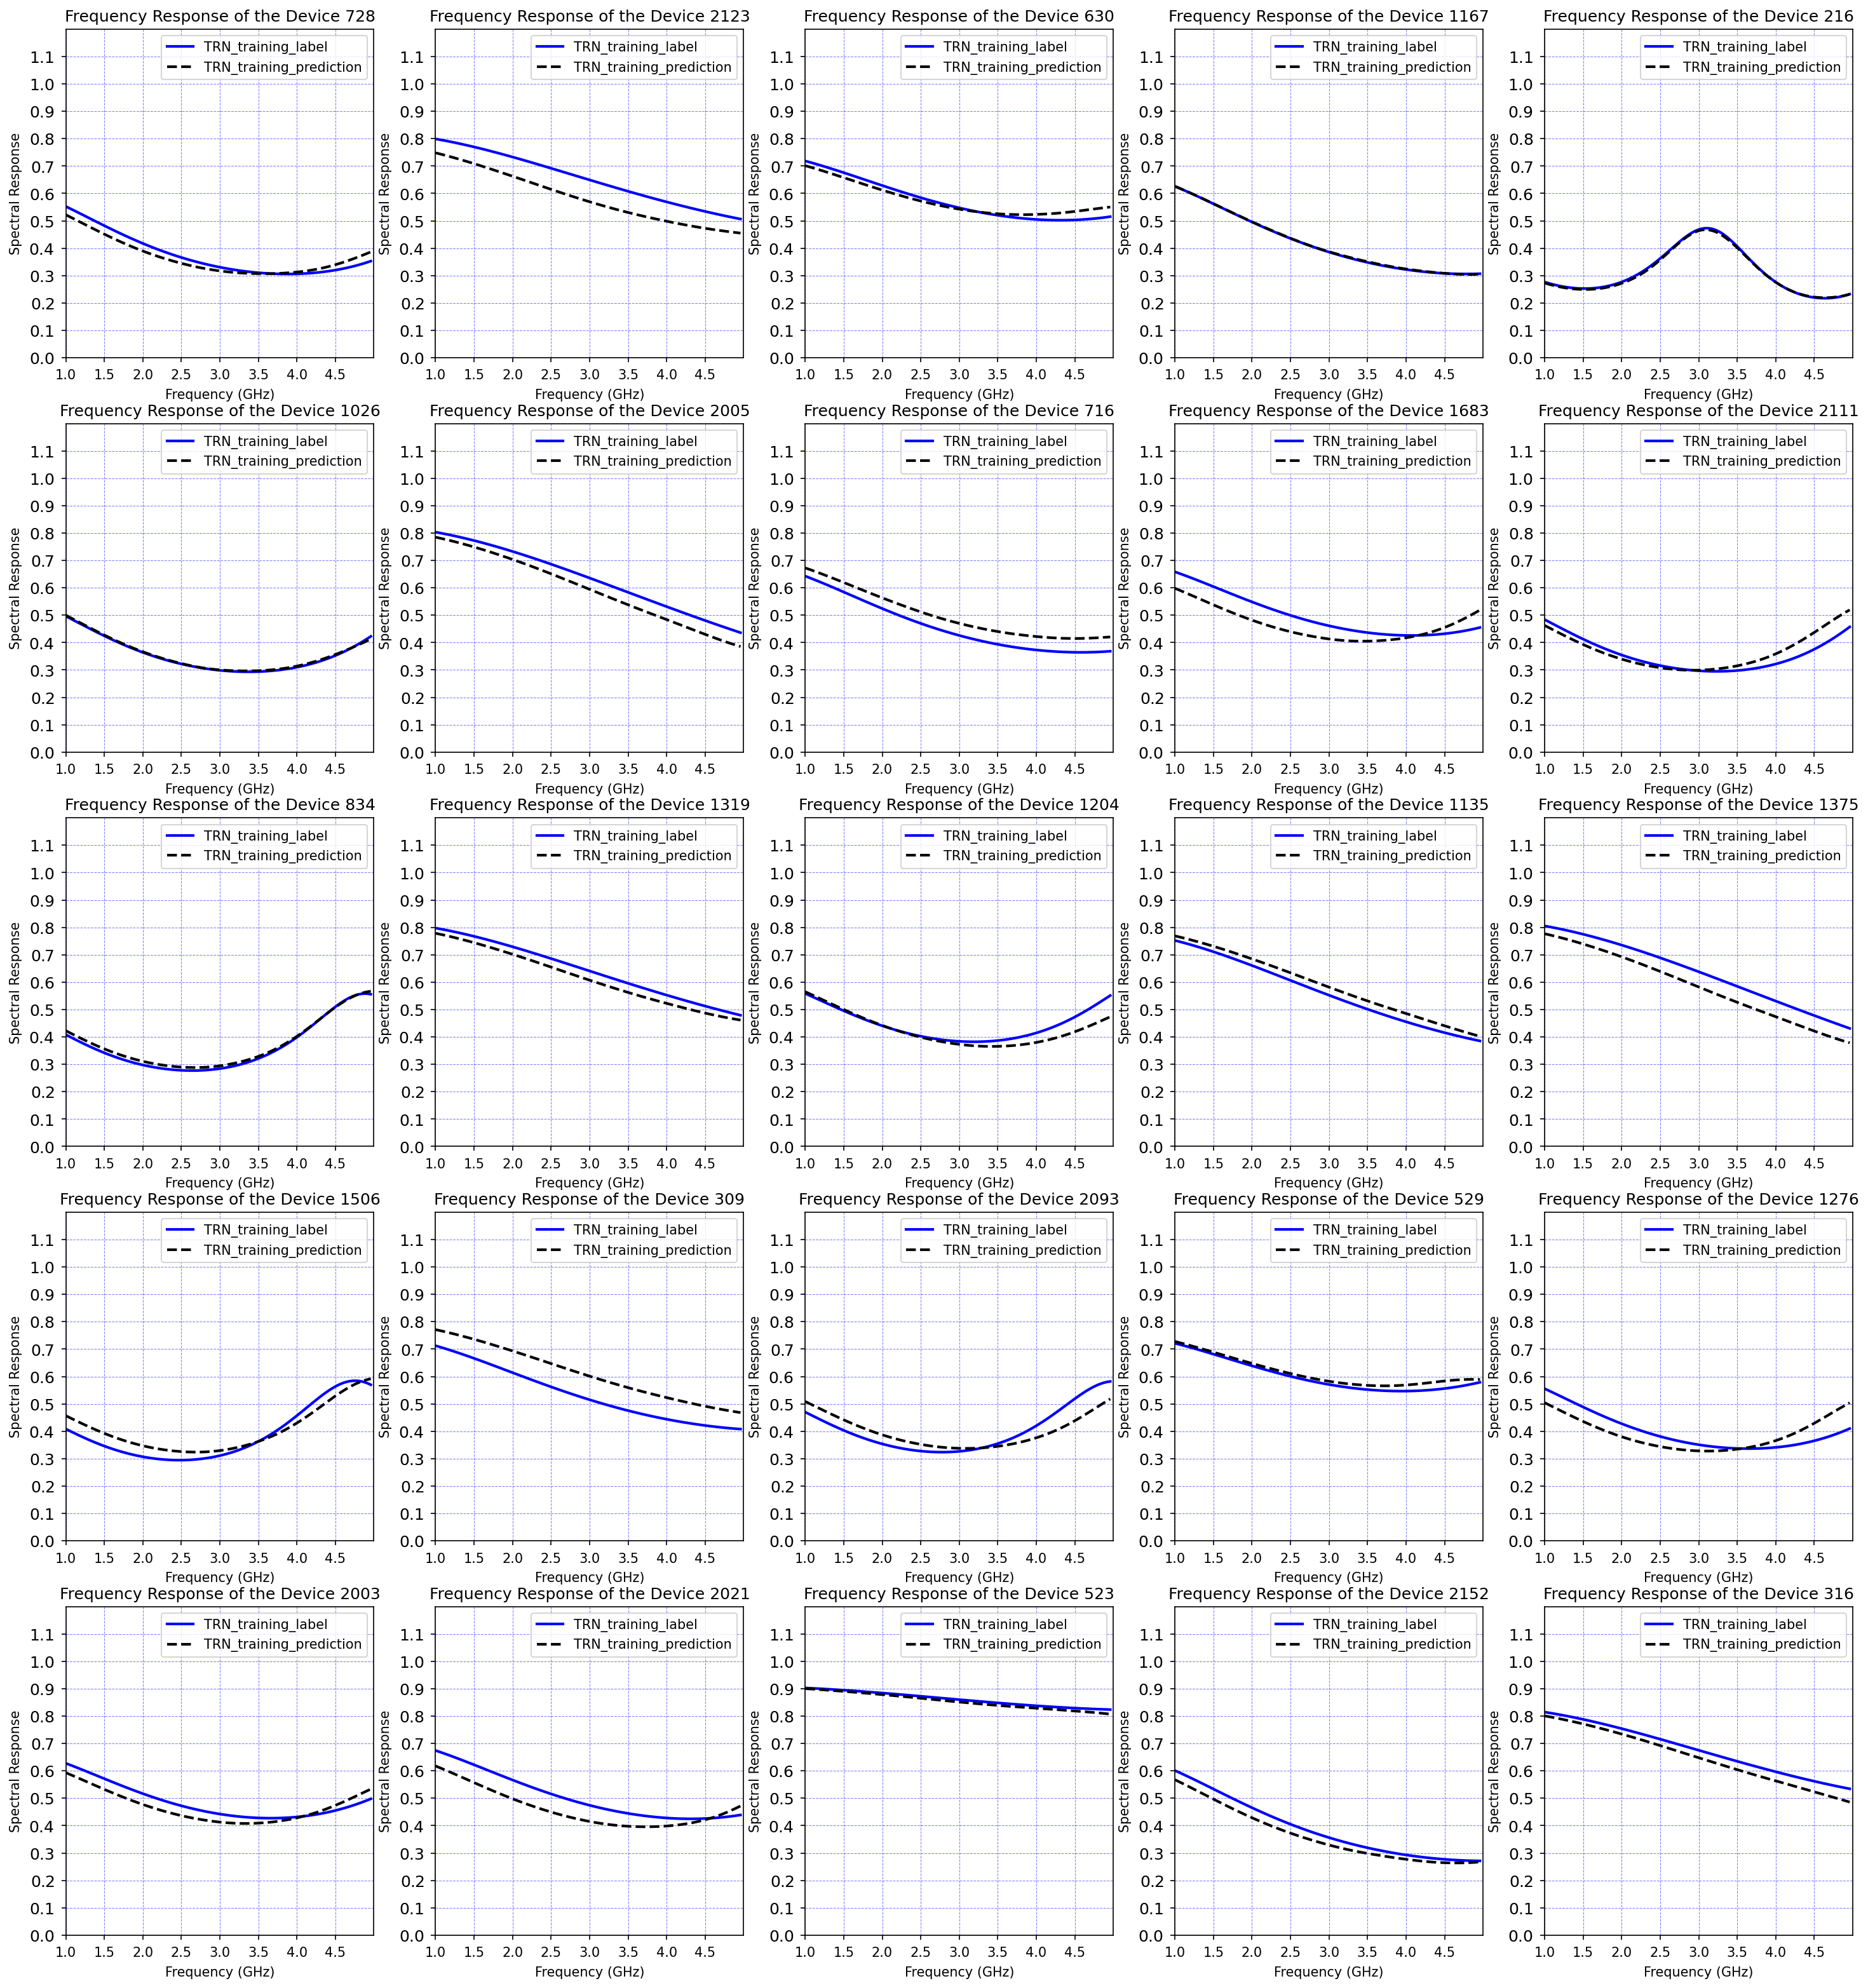

Number of seconds elapsed: 1.5024850000008882 seconds
Number of minutes elapsed: 0.02504141666668147 minutes
Number of hours elapsed: 0.0004173569444446912 hours


In [211]:
################################################
## PLOTTING PREDICTIONS VS. TRAINING LABELS
################################################

start = timer()

plot_row    = 5
plot_column = 5

#subplots with confiugrable rows and columns, figure size and dots per inch
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row , ncols = plot_column, figsize = (25,25), dpi = 150, constrained_layout=True) 

for x_plot in range(plot_row):
  for y_plot in range(plot_column):

    #imageIndex = x_plot*(plot_row + y_plot)
    imageIndex = np.random.randint(trainPercentage)

    #Axis number spacing
    plt.rcParams['xtick.major.pad']=5
    plt.rcParams['ytick.major.pad']=5

    #Setting colors, linewidths, linetypes
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, TRN_TRAIN[imageIndex,:], color ='blue'  , lw=2,  ls='-', label = 'TRN_training_label')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, Predictions_train[imageIndex,:], color ='black' , lw=2,  ls='--', label = 'TRN_training_prediction')

    #Axis label spacing
    #Axis label spacing
    axes[x_plot, y_plot].xaxis.labelpad = 5
    axes[x_plot, y_plot].yaxis.labelpad = 5

    #Legends, labels, and title
    axes[x_plot, y_plot].set_xlabel('Frequency (GHz)')
    axes[x_plot, y_plot].set_ylabel('Spectral Response')
    axes[x_plot, y_plot].set_title('Frequency Response of the Device ' + str(imageIndex+1))
    axes[x_plot, y_plot].legend(loc=1)

    #Plot range
    axes[x_plot, y_plot].set_ylim([0,1.2])
    axes[x_plot, y_plot].set_xlim([1,5])

    #Placement of ticks and custom tick labels

    axes[x_plot, y_plot].set_xticks(list(np.arange(1,5,0.5)))
    yticks = list(np.arange(0,1.2,0.1))
    axes[x_plot, y_plot].set_yticks(yticks)
    axes[x_plot, y_plot].set_yticklabels(["$ %.1f $" % y for y in yticks], fontsize = 12)

    #Axis position adjustments
    fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);

    #Axis Grid
    axes[x_plot, y_plot].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    
    #Labels, Splines, and Tick Color
    color_type = 'black'
    axes[x_plot, y_plot].spines['bottom'].set_color(color_type)
    axes[x_plot, y_plot].spines['top'].set_color(color_type)
    axes[x_plot, y_plot].spines['left'].set_color(color_type)
    axes[x_plot, y_plot].spines['right'].set_color(color_type)
    axes[x_plot, y_plot].xaxis.label.set_color(color_type)
    axes[x_plot, y_plot].yaxis.label.set_color(color_type)
    axes[x_plot, y_plot].tick_params(axis='x', colors=color_type)
    axes[x_plot, y_plot].tick_params(axis='y', colors=color_type)


plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

In [212]:
################################################
## VALIDATION PROCESS
################################################

In [213]:
################################################
## PREPARATION OF VALIDATION SET FOR EVALUATION
################################################

X_test = X_val
Y_test = Y_val


print ("number of test examples = " + str(X_test.shape[0]))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

print(Y_test)

number of test examples = 244
X_test shape: (244, 128, 128, 1)
Y_test shape: (244, 100)
[[0.61072573 0.6061648  0.60153199 ... 0.4464612  0.45053206 0.45477073]
 [0.28364435 0.28011361 0.27680312 ... 0.35883992 0.36103044 0.36363768]
 [0.62063454 0.61630759 0.61191311 ... 0.50805057 0.51330114 0.51870947]
 ...
 [0.41090774 0.40509907 0.39934466 ... 0.57143848 0.57110479 0.56959921]
 [0.30108172 0.29750384 0.29414392 ... 0.31941639 0.32142732 0.32379608]
 [0.20074835 0.19813461 0.19576745 ... 0.23818334 0.24257769 0.24728457]]


In [214]:
################################################
## EVALUATE VALIDATION DATA SET
################################################

start = timer()

if training_mode:
    Predictions_train = Spectral_Model.evaluate(X_test, Y_test)
else: 
    Predictions_train = reconstructed_model.evaluate(X_test,Y_test)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

8/8 [==============================] - 0s 17ms/step - loss: 0.0012 - accuracy: 0.7787
Number of seconds elapsed: 0.34005729999989853 seconds
Number of minutes elapsed: 0.005667621666664975 minutes
Number of hours elapsed: 9.446036111108292e-05 hours


In [215]:
################################################
## PREDICT THE VALIDATION SETS
################################################

start = timer()

if training_mode:
    Predictions_test = Spectral_Model.predict(X_test)
else: 
    Predictions_test = reconstructed_model.predict(X_test)
print(Predictions_test[0])

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

[0.5985456  0.59367555 0.5887466  0.5837591  0.5787276  0.5736378
 0.56850964 0.56337184 0.55819005 0.5530131  0.5478248  0.5426528
 0.5374896  0.5323494  0.52723366 0.5221632  0.51712215 0.5121229
 0.5071905  0.502305   0.49747816 0.49271297 0.488036   0.4834157
 0.47887114 0.47442433 0.47003993 0.4657499  0.46154103 0.4574325
 0.45339018 0.4494544  0.44558933 0.44182575 0.43811807 0.4344958
 0.4309526  0.4274846  0.4241151  0.4208127  0.41762078 0.414534
 0.4115493  0.40869254 0.40593773 0.4032895  0.40075475 0.39831576
 0.39599076 0.39377883 0.39168945 0.389713   0.38784477 0.3861215
 0.38450694 0.3830287  0.38169032 0.3804663  0.37937355 0.37841624
 0.37758055 0.3768619  0.37629193 0.37582594 0.37547496 0.37526172
 0.37516627 0.37519446 0.37534067 0.3756386  0.37606236 0.37661386
 0.37726906 0.3780882  0.37913954 0.38021624 0.3814722  0.3828424
 0.3843605  0.3860305  0.387862   0.3898539  0.39200842 0.39434645
 0.39686587 0.39951223 0.4023567  0.40539342 0.40860778 0.4119899
 0.415

In [216]:
################################################
## COSINE SIMILARITY
################################################
Dat_A = Predictions_test
Dat_B = Y_test
cosSimScipy = []
cosSimNumpy = []
for item in range(Dat_A.shape[0]):
    # Solve for cosine similarity (scipy)
    cos_sim_scipy = 1 - spatial.distance.cosine(Dat_A[item], Dat_B[item])
    cosSimScipy.append(cos_sim_scipy)
    #print("Cosine Similarity using Scipy: " + str(cos_sim_scipy))

    # Solve for cosine similarity (numpy)
    cos_sim_numpy = dot(Dat_A[item], Dat_B[item])/(norm(Dat_A[item])*norm(Dat_B[item]))
    cosSimNumpy.append(cos_sim_numpy)
    #print("Cosine Similarity using Numpy: " + str(cos_sim_numpy))

print("Average Cosine Similarity using Scipy: ")
print(sum(cosSimScipy)/len(cosSimScipy))
print("Average Cosine Similarity using Numpy: ")
print(sum(cosSimNumpy)/len(cosSimNumpy))


Average Cosine Similarity using Scipy: 
0.9987578260121237
Average Cosine Similarity using Numpy: 
0.9987578235948091


C:\Users\admin\AppData\Local\Temp\ipykernel_44016\434745761.py:52: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);


<Figure size 432x288 with 0 Axes>

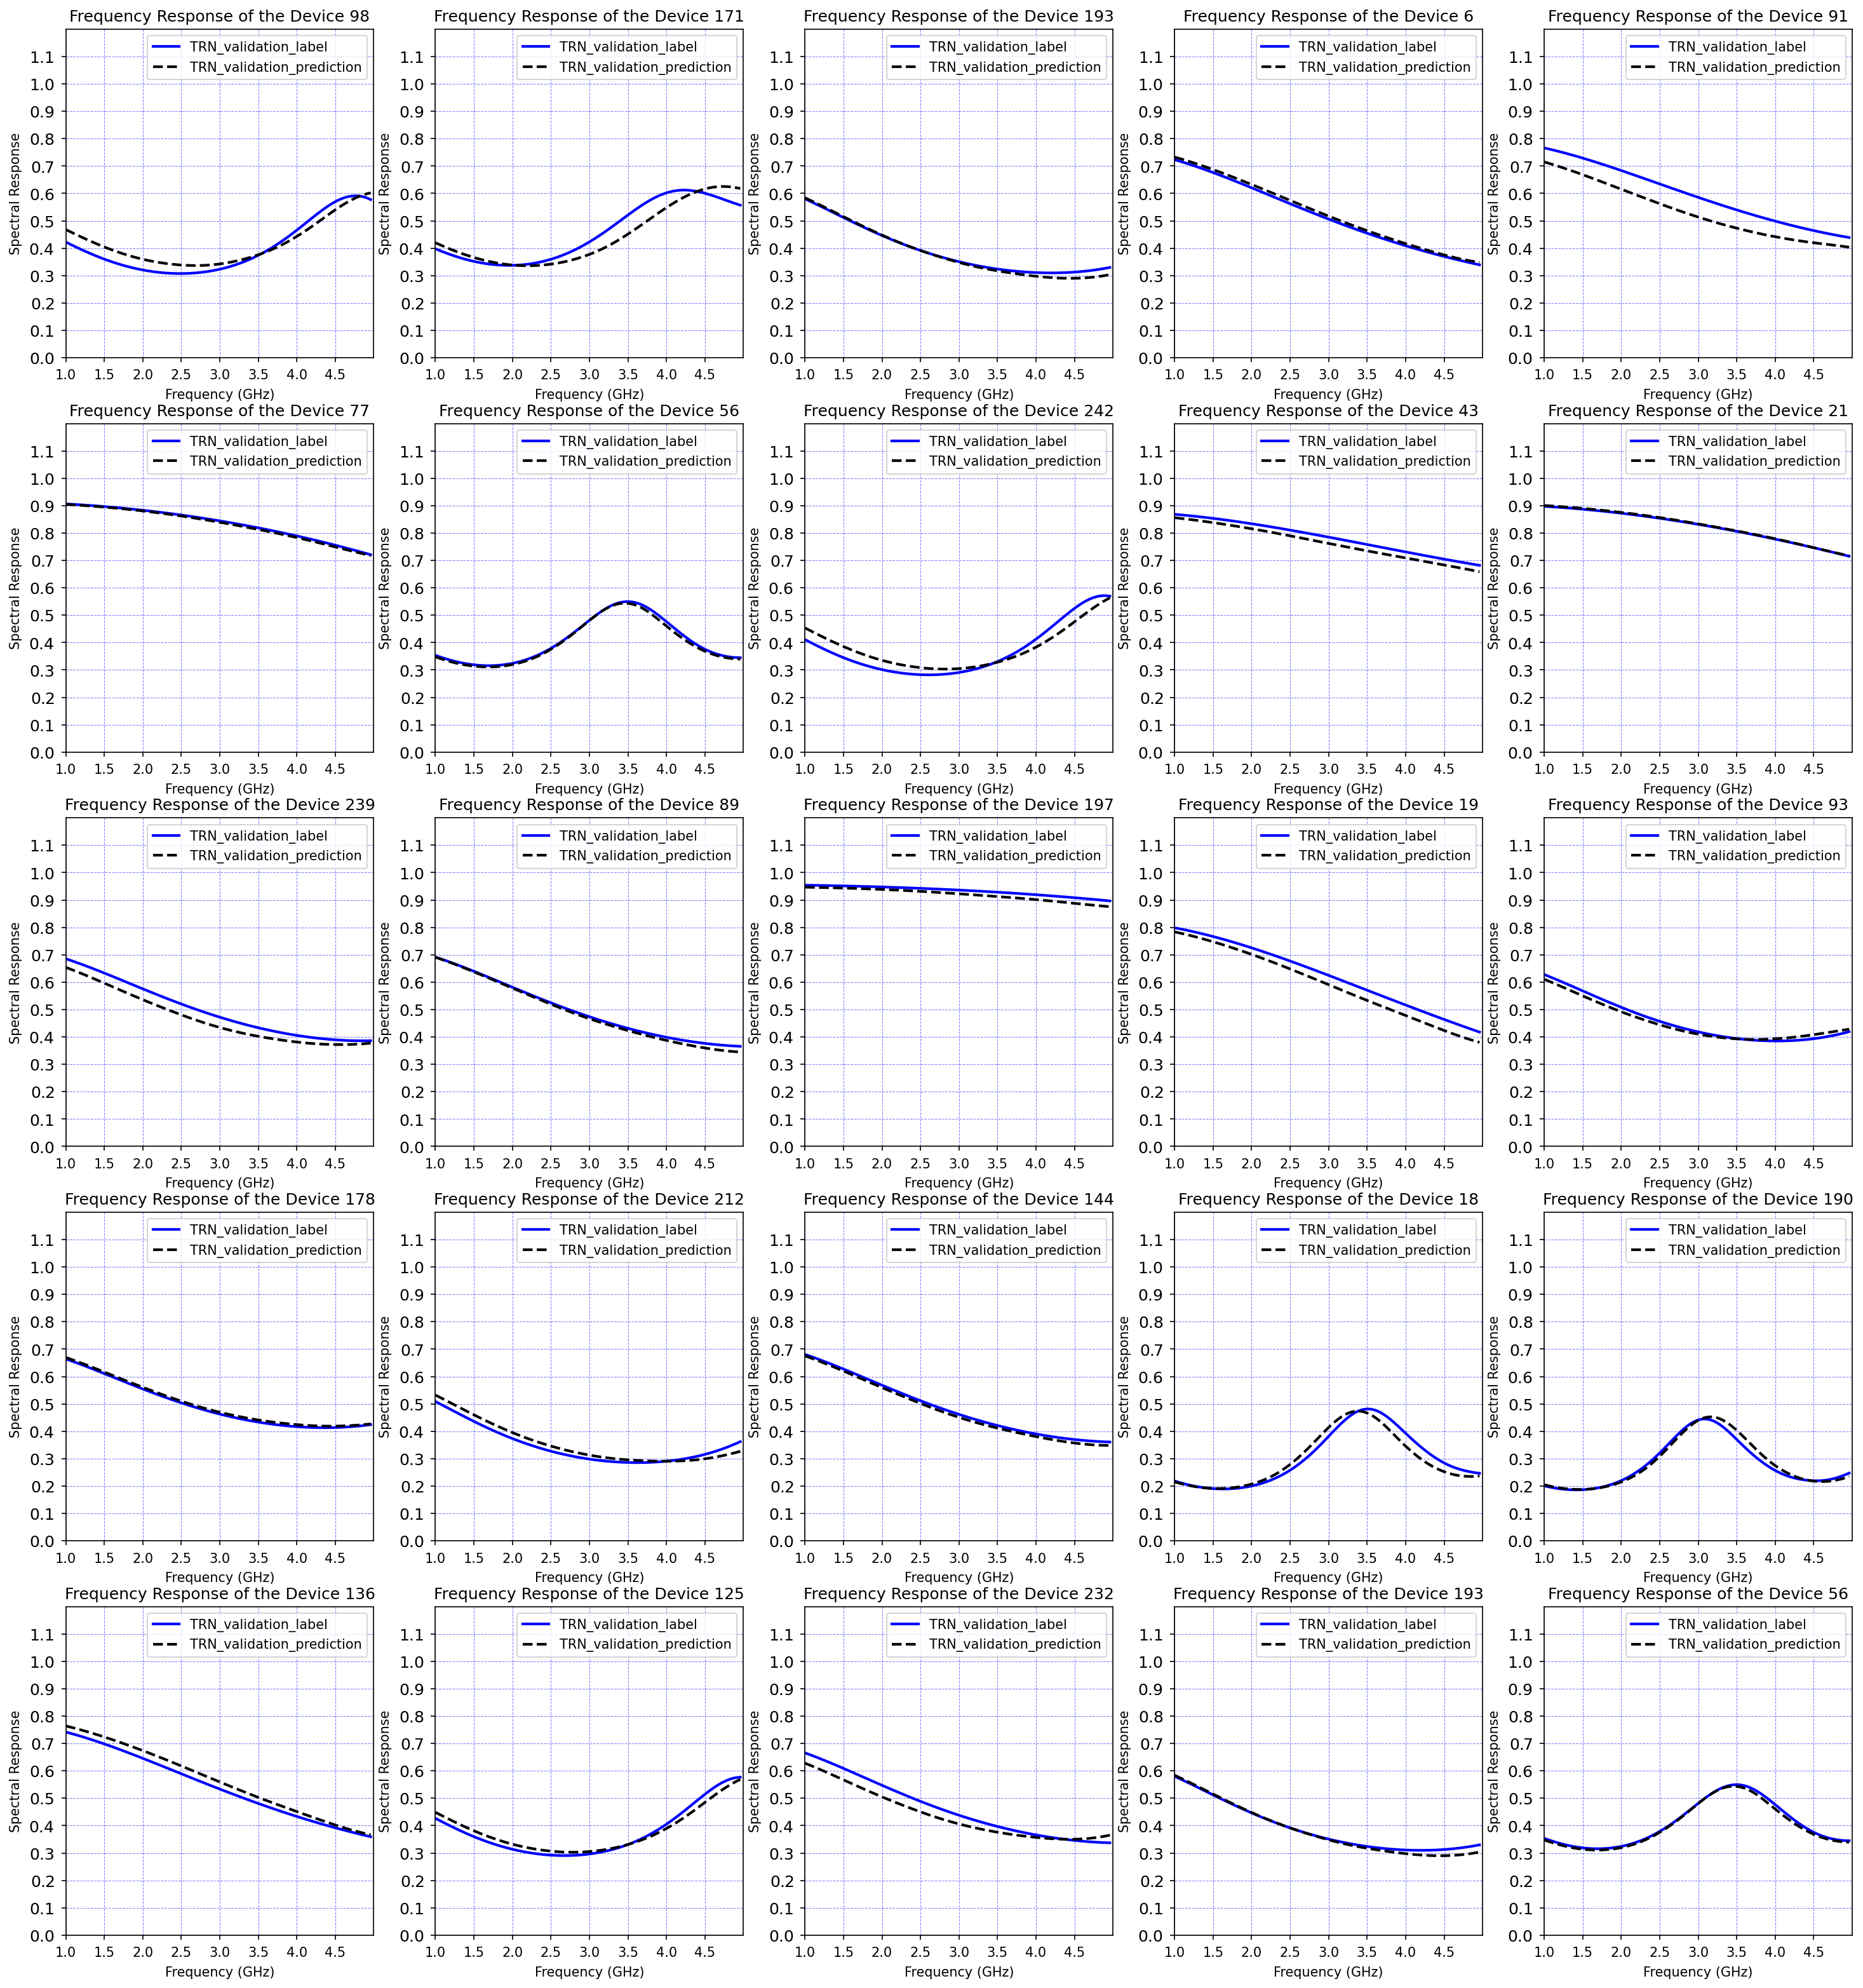

Number of seconds elapsed: 1.6359666000025754 seconds
Number of minutes elapsed: 0.027266110000042924 minutes
Number of hours elapsed: 0.00045443516666738204 hours


In [217]:
################################################
## PLOTTING PREDICTIONS VS. VALIDATION LABELS
################################################

start = timer()

plot_row    = 5
plot_column = 5

#subplots with confiugrable rows and columns, figure size and dots per inch
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row , ncols = plot_column, figsize = (25,25), dpi = 150, constrained_layout=True) 

for x_plot in range(plot_row):
  for y_plot in range(plot_column):

    #imageIndex = x_plot*(plot_row + y_plot)
   
    imageIndex = np.random.randint(testPercentage)
    
    #Axis number spacing
    plt.rcParams['xtick.major.pad']=5
    plt.rcParams['ytick.major.pad']=5

    #Setting colors, linewidths, linetypes
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, Y_test[imageIndex,:], color ='blue'  , lw=2,  ls='-', label = 'TRN_validation_label')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, Predictions_test[imageIndex,:], color ='black' , lw=2,  ls='--', label = 'TRN_validation_prediction')

    #Axis label spacing
    #Axis label spacing
    axes[x_plot, y_plot].xaxis.labelpad = 5
    axes[x_plot, y_plot].yaxis.labelpad = 5

    #Legends, labels, and title
    axes[x_plot, y_plot].set_xlabel('Frequency (GHz)')
    axes[x_plot, y_plot].set_ylabel('Spectral Response')
    axes[x_plot, y_plot].set_title('Frequency Response of the Device ' + str(imageIndex+1))
    axes[x_plot, y_plot].legend(loc=1)

    #Plot range
    axes[x_plot, y_plot].set_ylim([0,1.2])
    axes[x_plot, y_plot].set_xlim([1,5])

    #Placement of ticks and custom tick labels

    axes[x_plot, y_plot].set_xticks(list(np.arange(1,5,0.5)))
    yticks = list(np.arange(0,1.2,0.1))
    axes[x_plot, y_plot].set_yticks(yticks)
    axes[x_plot, y_plot].set_yticklabels(["$ %.1f $" % y for y in yticks], fontsize = 12)

    #Axis position adjustments
    fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);

    #Axis Grid
    axes[x_plot, y_plot].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

    #Labels, Splines, and Tick Color
    color_type = 'black'
    axes[x_plot, y_plot].spines['bottom'].set_color(color_type)
    axes[x_plot, y_plot].spines['top'].set_color(color_type)
    axes[x_plot, y_plot].spines['left'].set_color(color_type)
    axes[x_plot, y_plot].spines['right'].set_color(color_type)
    axes[x_plot, y_plot].xaxis.label.set_color(color_type)
    axes[x_plot, y_plot].yaxis.label.set_color(color_type)
    axes[x_plot, y_plot].tick_params(axis='x', colors=color_type)
    axes[x_plot, y_plot].tick_params(axis='y', colors=color_type)

plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

In [218]:
################################################
## TESTING PROCESS
################################################

In [254]:
################################################
## LOAD ENTIRE TEST DATASET
################################################

# I did not change the val_ and _val naming to test_ or _test due to laziness.
# Just take note that everything in this code is now related to the test set.


start = timer()

# def load_spectrum_dataset():
# Load the Dataset

val_dataset  = h5py.File('test_set_100.h5', 'r')
#val_dataset  = h5py.File('Responses_1329.h5', 'r')

# Extract the keys
keys           = list(val_dataset.keys())

# Separate the Materials and Spectrum Response Data
material_val       = val_dataset[keys[0]]
spectrum_val       = val_dataset[keys[1]]

# Get individual keys for materials and spectrum
keys_mat_val       = list(material_val.keys())
keys_spec_val      = list(spectrum_val.keys())

print(keys_mat_val)
print(keys_spec_val)

# Separate the components of material group
DEV_ER_mat_val     = material_val[keys_mat_val[0]]
DEV_SIG_mat_val    = material_val[keys_mat_val[1]]

# Separate the components of the spectrum group
A_spec_val         = spectrum_val[keys_spec_val[0]]
C_spec_val         = spectrum_val[keys_spec_val[1]]
R_spec_val         = spectrum_val[keys_spec_val[2]]
T_spec_val         = spectrum_val[keys_spec_val[3]]


# Testing for the accessibility of the data in the spectrum group
#print(A_spec['1'][:].reshape(1,100).squeeze())
#print(C_spec['1'][:].reshape(1,100).squeeze())
#print(R_spec['1'][:].reshape(1,100).squeeze())
#print(T_spec['1'][:].reshape(1,100).squeeze())
DEV_ER_mat_x_val = DEV_ER_mat_val['1'][:].reshape(128,128,1).shape[0]
DEV_ER_mat_y_val = DEV_ER_mat_val['1'][:].reshape(128,128,1).shape[1]

# Retriving a list for the total number of samples (HDF5 groups cannot be indexed easily)
sub_keys_spectrum_val = list(A_spec_val.keys())
spec_index_val        = [int(x) for x in sub_keys_spectrum_val]
#print(sorted(spec_index_val))
#print(len(spec_index_val))

# Prepare for the numpy data containers
DEV_ER_val    = np.zeros([len(spec_index_val), 128, 128, 1])
DEV_SIG_val   = np.zeros([len(spec_index_val), 128, 128, 1])
REF_val       = np.zeros([len(spec_index_val), 100])
TRN_val       = np.zeros([len(spec_index_val), 100])
ABS_val       = np.zeros([len(spec_index_val), 100])
CON_val       = np.zeros([len(spec_index_val), 100])

# Create a for loop to fill the numpy data containers from the HDF5 file containers

for i in range(len(spec_index_val)):
    DEV_ER_val[i, :, :,:]       = DEV_ER_mat_val[str(i)][:].reshape([DEV_ER_mat_x_val, DEV_ER_mat_y_val, 1])
    DEV_SIG_val[i, :, :,:]      = DEV_SIG_mat_val[str(i)][:].reshape([DEV_ER_mat_x_val, DEV_ER_mat_y_val, 1])
    REF_val[i, :]               = R_spec_val[str(i)][:].reshape(1,R_spec_val['1'][:].shape[0]).squeeze()
    TRN_val[i, :]               = T_spec_val[str(i)][:].reshape(1,T_spec_val['1'][:].shape[0]).squeeze()
    ABS_val[i, :]               = A_spec_val[str(i)][:].reshape(1,A_spec_val['1'][:].shape[0]).squeeze()
    CON_val[i, :]               = C_spec_val[str(i)][:].reshape(1,C_spec_val['1'][:].shape[0]).squeeze()
    
#return DEV_ER, DEV_SIG, REF, TRN, ABS, CON

print(REF_val[:].shape)
print(DEV_ER_val[:].shape)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

['DevER', 'DevSIG']
['A', 'C', 'R', 'T']
(100, 100)
(100, 128, 128, 1)
Number of seconds elapsed: 0.2744937999814283 seconds
Number of minutes elapsed: 0.004574896666357139 minutes
Number of hours elapsed: 7.624827777261899e-05 hours


C:\Users\admin\AppData\Local\Temp\ipykernel_44016\340159336.py:53: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);


<Figure size 432x288 with 0 Axes>

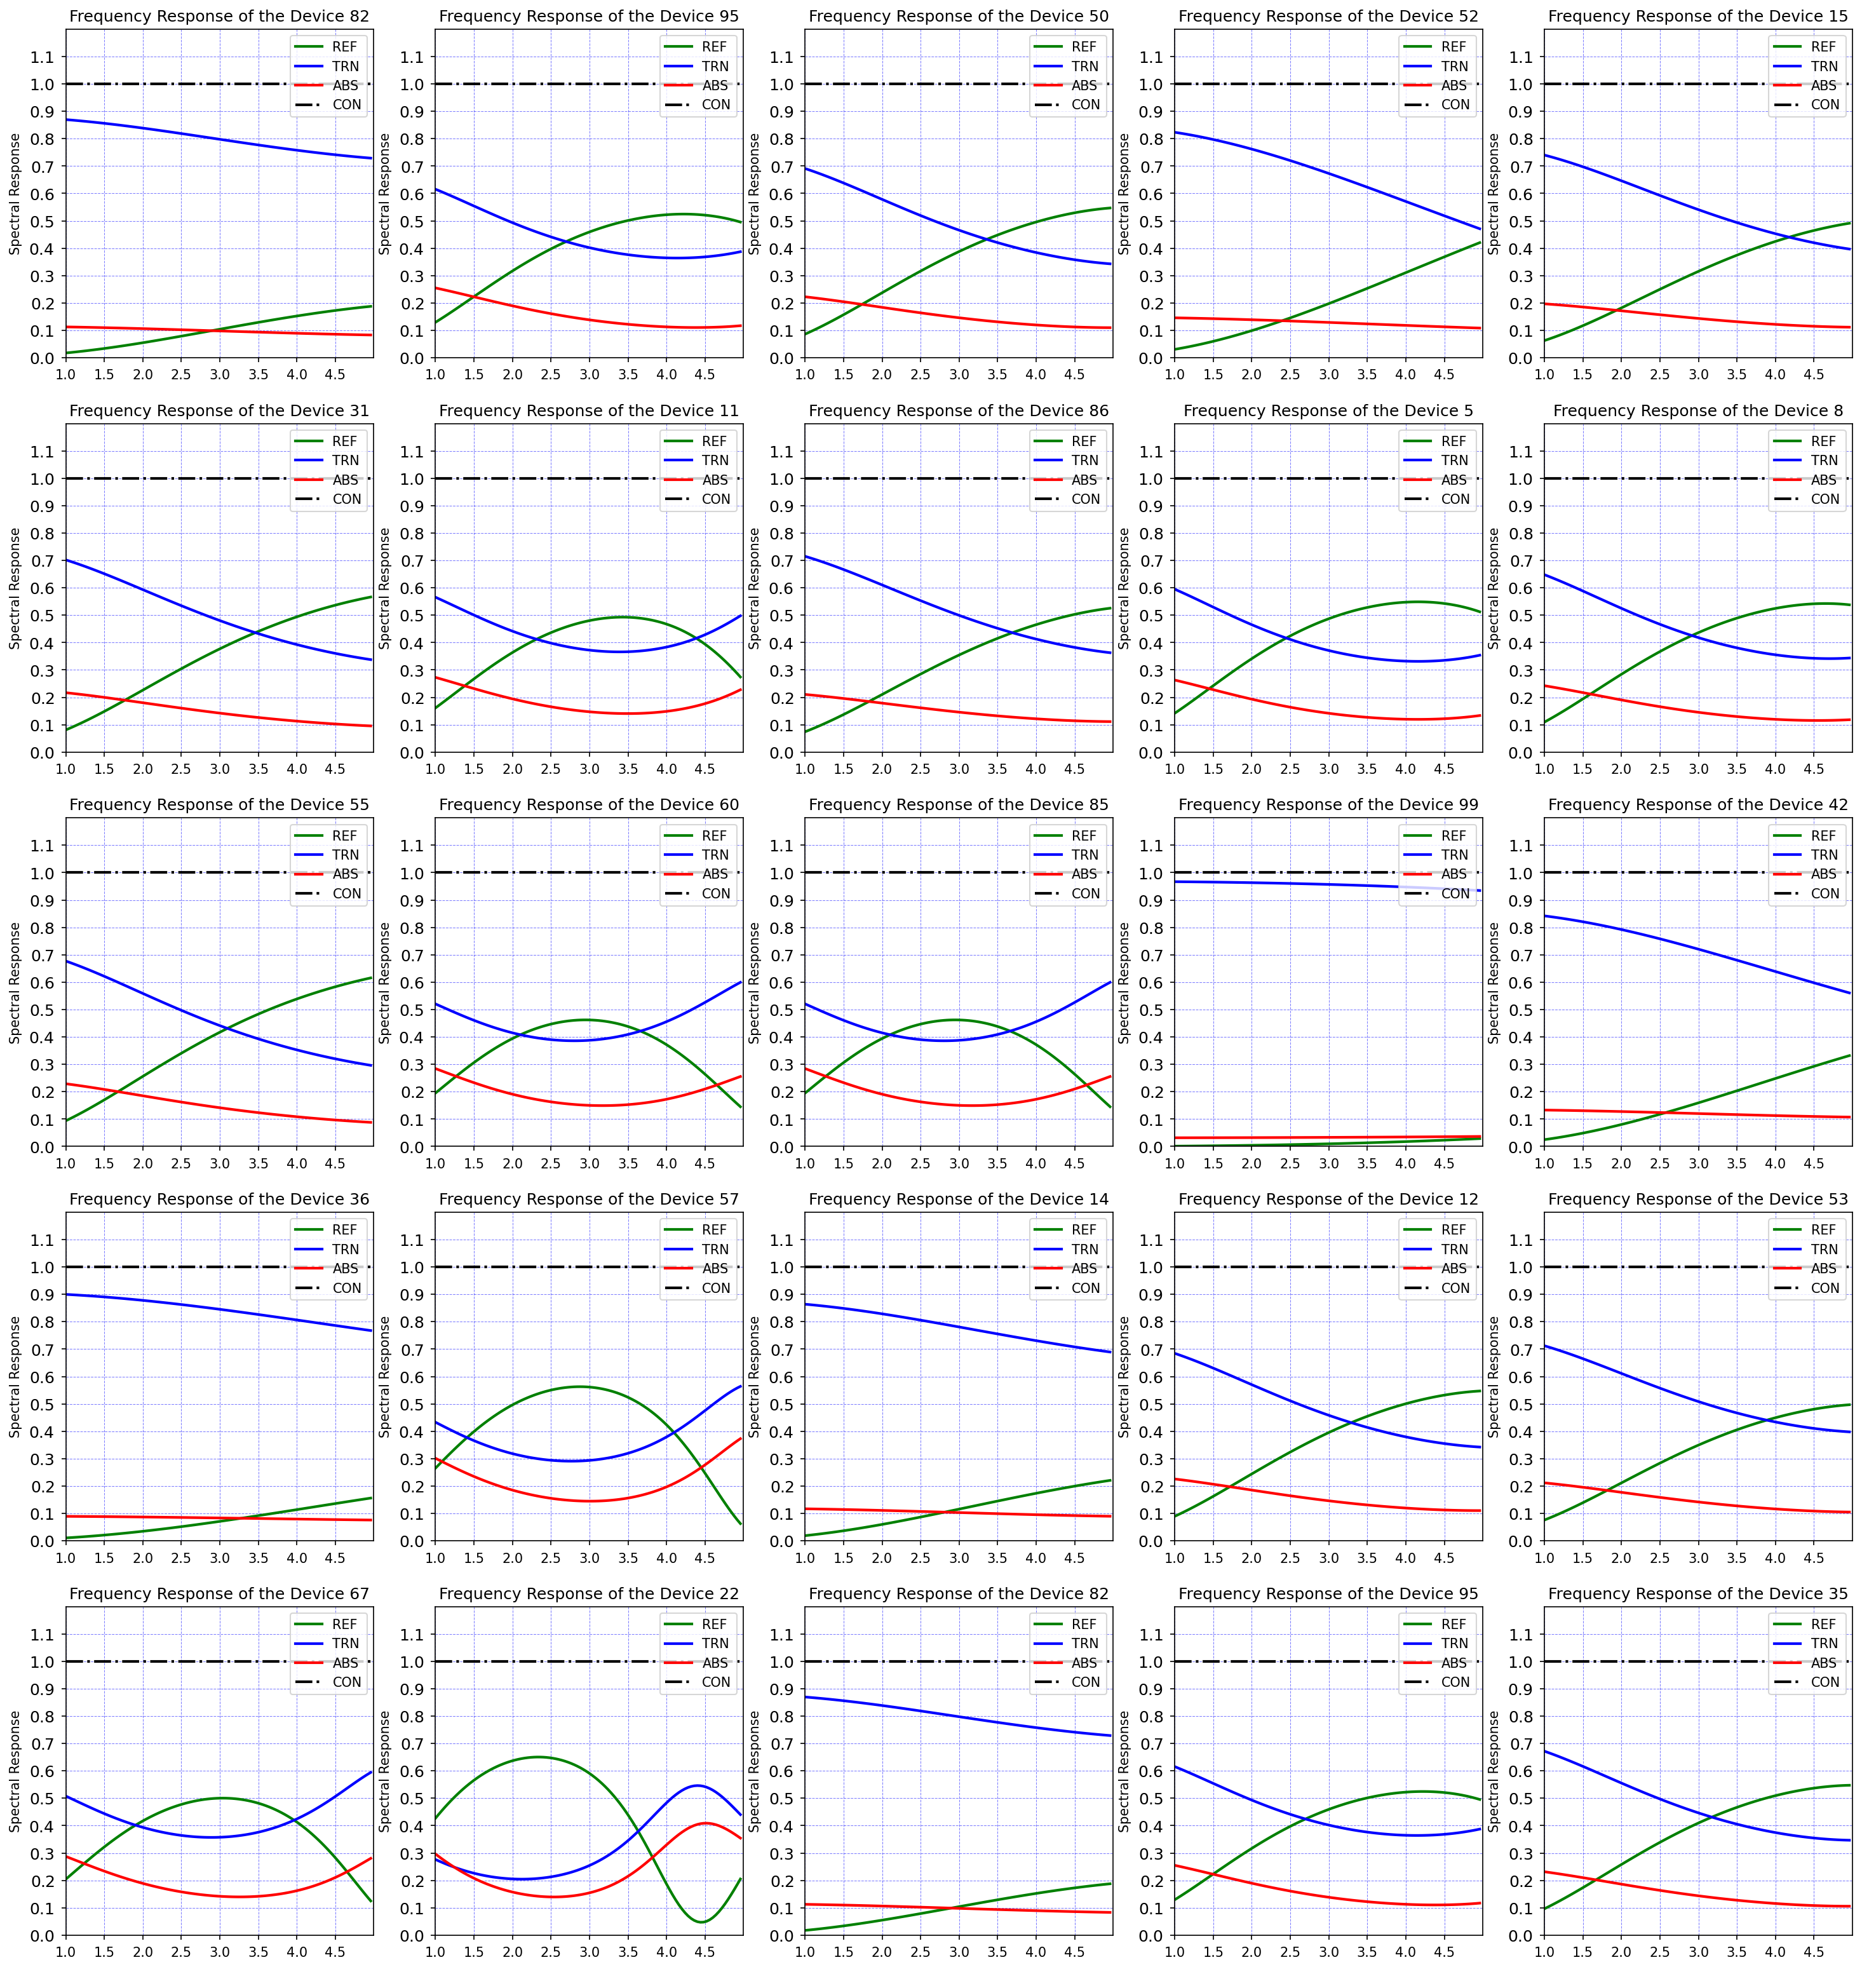

Number of seconds elapsed: 2.298116099991603 seconds
Number of minutes elapsed: 0.038301934999860045 minutes
Number of hours elapsed: 0.0006383655833310007 hours


In [255]:
################################################
## PLOTTING FOR TEST/VALIDATION DATA SET
################################################

start = timer()

plot_row    = 5
plot_column = 5

#subplots with confiugrable rows and columns, figure size and dots per inch
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row , ncols = plot_column, figsize = (25,25), dpi = 150, constrained_layout=True) 

for x_plot in range(plot_row):
  for y_plot in range(plot_column):

    #imageIndex = x_plot*(plot_row + y_plot)
    imageIndex = np.random.randint(len(spec_index_val))

    #Axis number spacing
    plt.rcParams['xtick.major.pad']=5
    plt.rcParams['ytick.major.pad']=5

    #Setting colors, linewidths, linetypes
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, REF_val[imageIndex,:], color ='green'   , lw=2,  ls='-', label = 'REF')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, TRN_val[imageIndex,:], color ='blue'  , lw=2,  ls='-', label = 'TRN')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, ABS_val[imageIndex,:], color ='red' , lw=2,  ls='-', label = 'ABS')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, CON_val[imageIndex,:], color ='black' , lw=2,  ls='-.', label = 'CON')

    #Axis label spacing
    axes[x_plot, y_plot].xaxis.labelpad = 5
    axes[x_plot, y_plot].yaxis.labelpad = 5

    #Legends, labels, and title
    axes[x_plot, y_plot].set_xlabel('Frequency (GHz)')
    axes[x_plot, y_plot].set_ylabel('Spectral Response')
    axes[x_plot, y_plot].set_title('Frequency Response of the Device ' + str(imageIndex+1))
    axes[x_plot, y_plot].legend(loc=1)
    axes[x_plot, y_plot].xaxis.label.set_color('white')

    #Plot range
    axes[x_plot, y_plot].set_ylim([0,1.2])
    axes[x_plot, y_plot].set_xlim([1,5])

    #Placement of ticks and custom tick labels

    axes[x_plot, y_plot].set_xticks(list(np.arange(1,5,0.5)))
    yticks = list(np.arange(0,1.2,0.1))
    axes[x_plot, y_plot].set_yticks(yticks)
    axes[x_plot, y_plot].set_yticklabels(["$ %.1f $" % y for y in yticks], fontsize = 12)

    #Axis position adjustments
    fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);

    #Axis Grid
    axes[x_plot, y_plot].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)


plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

<Figure size 432x288 with 0 Axes>

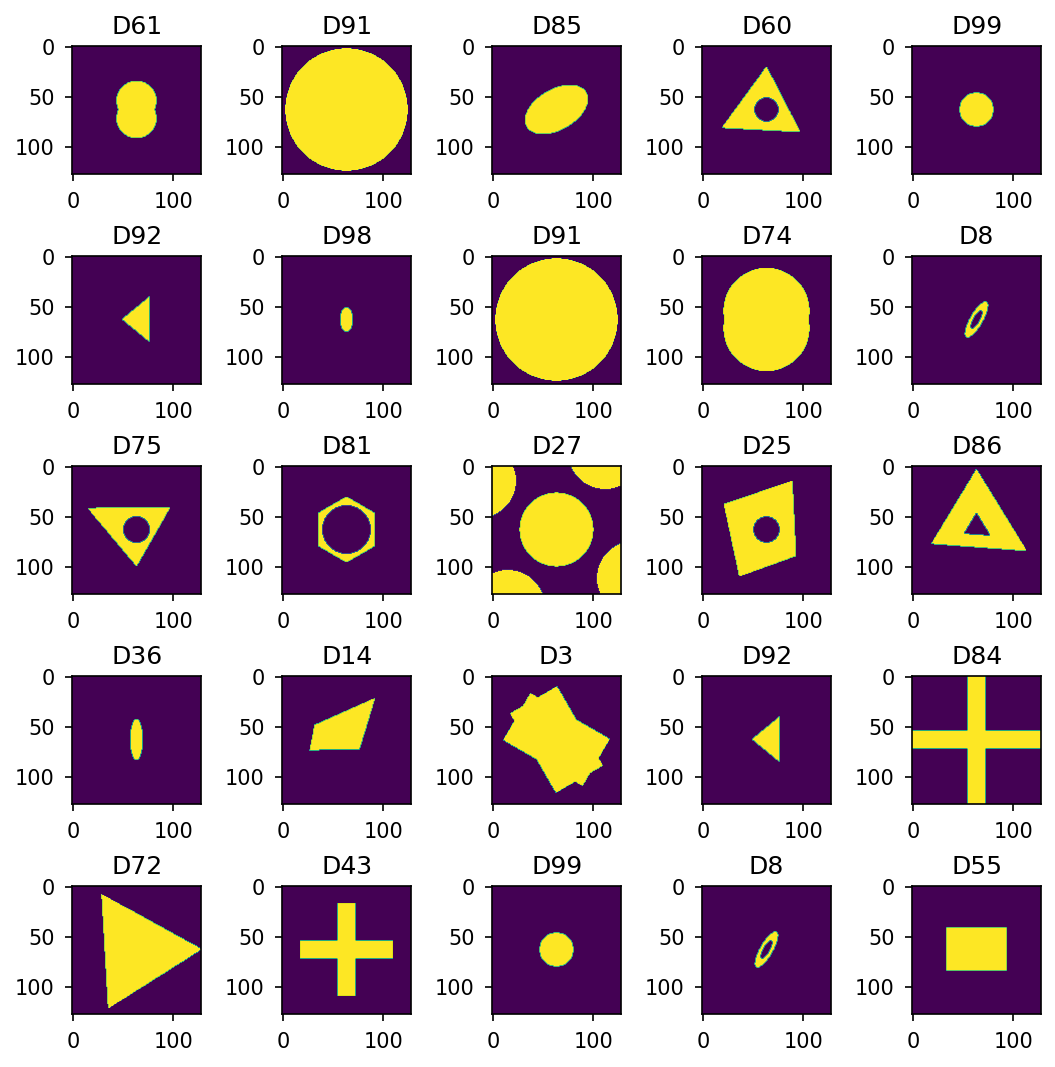

Number of seconds elapsed: 1.0647633000044152 seconds
Number of minutes elapsed: 0.017746055000073587 minutes
Number of hours elapsed: 0.0002957675833345598 hours


In [256]:
################################################
## DISPLAY IMAGE FOR TEST/VALIDATION DATA SET
################################################

start = timer()

plot_row = 5
plot_column = 5
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row, ncols = plot_column, figsize = (7,7), dpi = 150, constrained_layout=True) 

for x_plot in range(plot_row):
  for y_plot in range(plot_column):
    #imageIndex = x_plot*(plot_row + y_plot)
    imageIndex = np.random.randint(len(spec_index_val))
    axes[x_plot,y_plot].imshow(DEV_ER_val[imageIndex].reshape((DEV_ER_val.shape[1],DEV_ER.shape[1])).T) #display sample training image
    axes[x_plot,y_plot].set_title('D'+ str(imageIndex))
plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

In [257]:
################################################
## PREPARATION OF THE TEST FOR TRAINING
################################################

X_test = DEV_ER_val
Y_test = TRN_val

print ("number of test examples = " + str(X_test.shape[0]))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

print(Y_test)

number of test examples = 100
X_test shape: (100, 128, 128, 1)
Y_test shape: (100, 100)
[[0.49094429 0.48525338 0.47954748 ... 0.50560783 0.51378179 0.52184793]
 [0.56735434 0.56200194 0.55657248 ... 0.29192174 0.29310445 0.29438497]
 [0.9863319  0.98631684 0.98630118 ... 0.98228512 0.98221877 0.98215198]
 ...
 [0.78195301 0.77974421 0.77746751 ... 0.53156465 0.53077142 0.53004585]
 [0.96691547 0.9668183  0.9667172  ... 0.9358017  0.93519164 0.93457368]
 [0.87601735 0.87501384 0.87397143 ... 0.62105276 0.61709386 0.61311578]]


In [258]:
################################################
## EVALUATE TEST DATA SET
################################################

start = timer()

if training_mode:
    Predictions_train = Spectral_Model.evaluate(X_test, Y_test)
else: 
    Predictions_train = reconstructed_model.evaluate(X_test,Y_test)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

4/4 [==============================] - 0s 50ms/step - loss: 3.5039e-05 - accuracy: 0.8500
Number of seconds elapsed: 0.34181519999401644 seconds
Number of minutes elapsed: 0.005696919999900274 minutes
Number of hours elapsed: 9.494866666500456e-05 hours


In [259]:
################################################
## PREDICT THE TEST/VALIDATION SETS
################################################

start = timer()

if training_mode:
    Predictions_test = Spectral_Model.predict(X_test)
else: 
    Predictions_test = reconstructed_model.predict(X_test)
print(Predictions_test[0])

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

[0.49631822 0.49065766 0.4849873  0.47931123 0.47364333 0.46798268
 0.46236888 0.45678708 0.451245   0.44576424 0.44035366 0.4350142
 0.42976967 0.42460576 0.41951758 0.41455793 0.40969774 0.40492678
 0.40029457 0.39577472 0.39137274 0.38708696 0.3829387  0.37891218
 0.37501022 0.3712645  0.3676268  0.36414832 0.3607905  0.35758963
 0.35450733 0.35158616 0.34878704 0.34614587 0.34360912 0.3411945
 0.33891597 0.33676136 0.3347468  0.33281574 0.33103594 0.3293829
 0.3278592  0.3264842  0.32523894 0.32411796 0.32315716 0.32232425
 0.3216271  0.32107696 0.32067323 0.32041287 0.32027084 0.3203196
 0.32049486 0.3208405  0.3213379  0.32198107 0.3227694  0.32373345
 0.32482105 0.32606706 0.32747462 0.3290205  0.3307082  0.33255708
 0.33456317 0.33673528 0.3390923  0.34162587 0.34434202 0.3472576
 0.35038266 0.35373592 0.3574255  0.36120713 0.3651749  0.3694171
 0.37391084 0.37864223 0.38362035 0.3888334  0.3942883  0.39999917
 0.40592867 0.4120752  0.4184415  0.4249914  0.4317117  0.43854874
 

In [260]:
################################################
## COSINE SIMILARITY
################################################
Dat_A = Predictions_test
Dat_B = Y_test
cosSimScipy = []
cosSimNumpy = []
for item in range(Dat_A.shape[0]):
    # Solve for cosine similarity (scipy)
    cos_sim_scipy = 1 - spatial.distance.cosine(Dat_A[item], Dat_B[item])
    cosSimScipy.append(cos_sim_scipy)
    #print("Cosine Similarity using Scipy: " + str(cos_sim_scipy))

    # Solve for cosine similarity (numpy)
    cos_sim_numpy = dot(Dat_A[item], Dat_B[item])/(norm(Dat_A[item])*norm(Dat_B[item]))
    cosSimNumpy.append(cos_sim_numpy)
    #print("Cosine Similarity using Numpy: " + str(cos_sim_numpy))

print("Average Cosine Similarity using Scipy: ")
print(sum(cosSimScipy)/len(cosSimScipy))
print("Average Cosine Similarity using Numpy: ")
print(sum(cosSimNumpy)/len(cosSimNumpy))

Average Cosine Similarity using Scipy: 
0.9999638108780351
Average Cosine Similarity using Numpy: 
0.9999638109531795


C:\Users\admin\AppData\Local\Temp\ipykernel_44016\3030093561.py:52: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);


<Figure size 432x288 with 0 Axes>

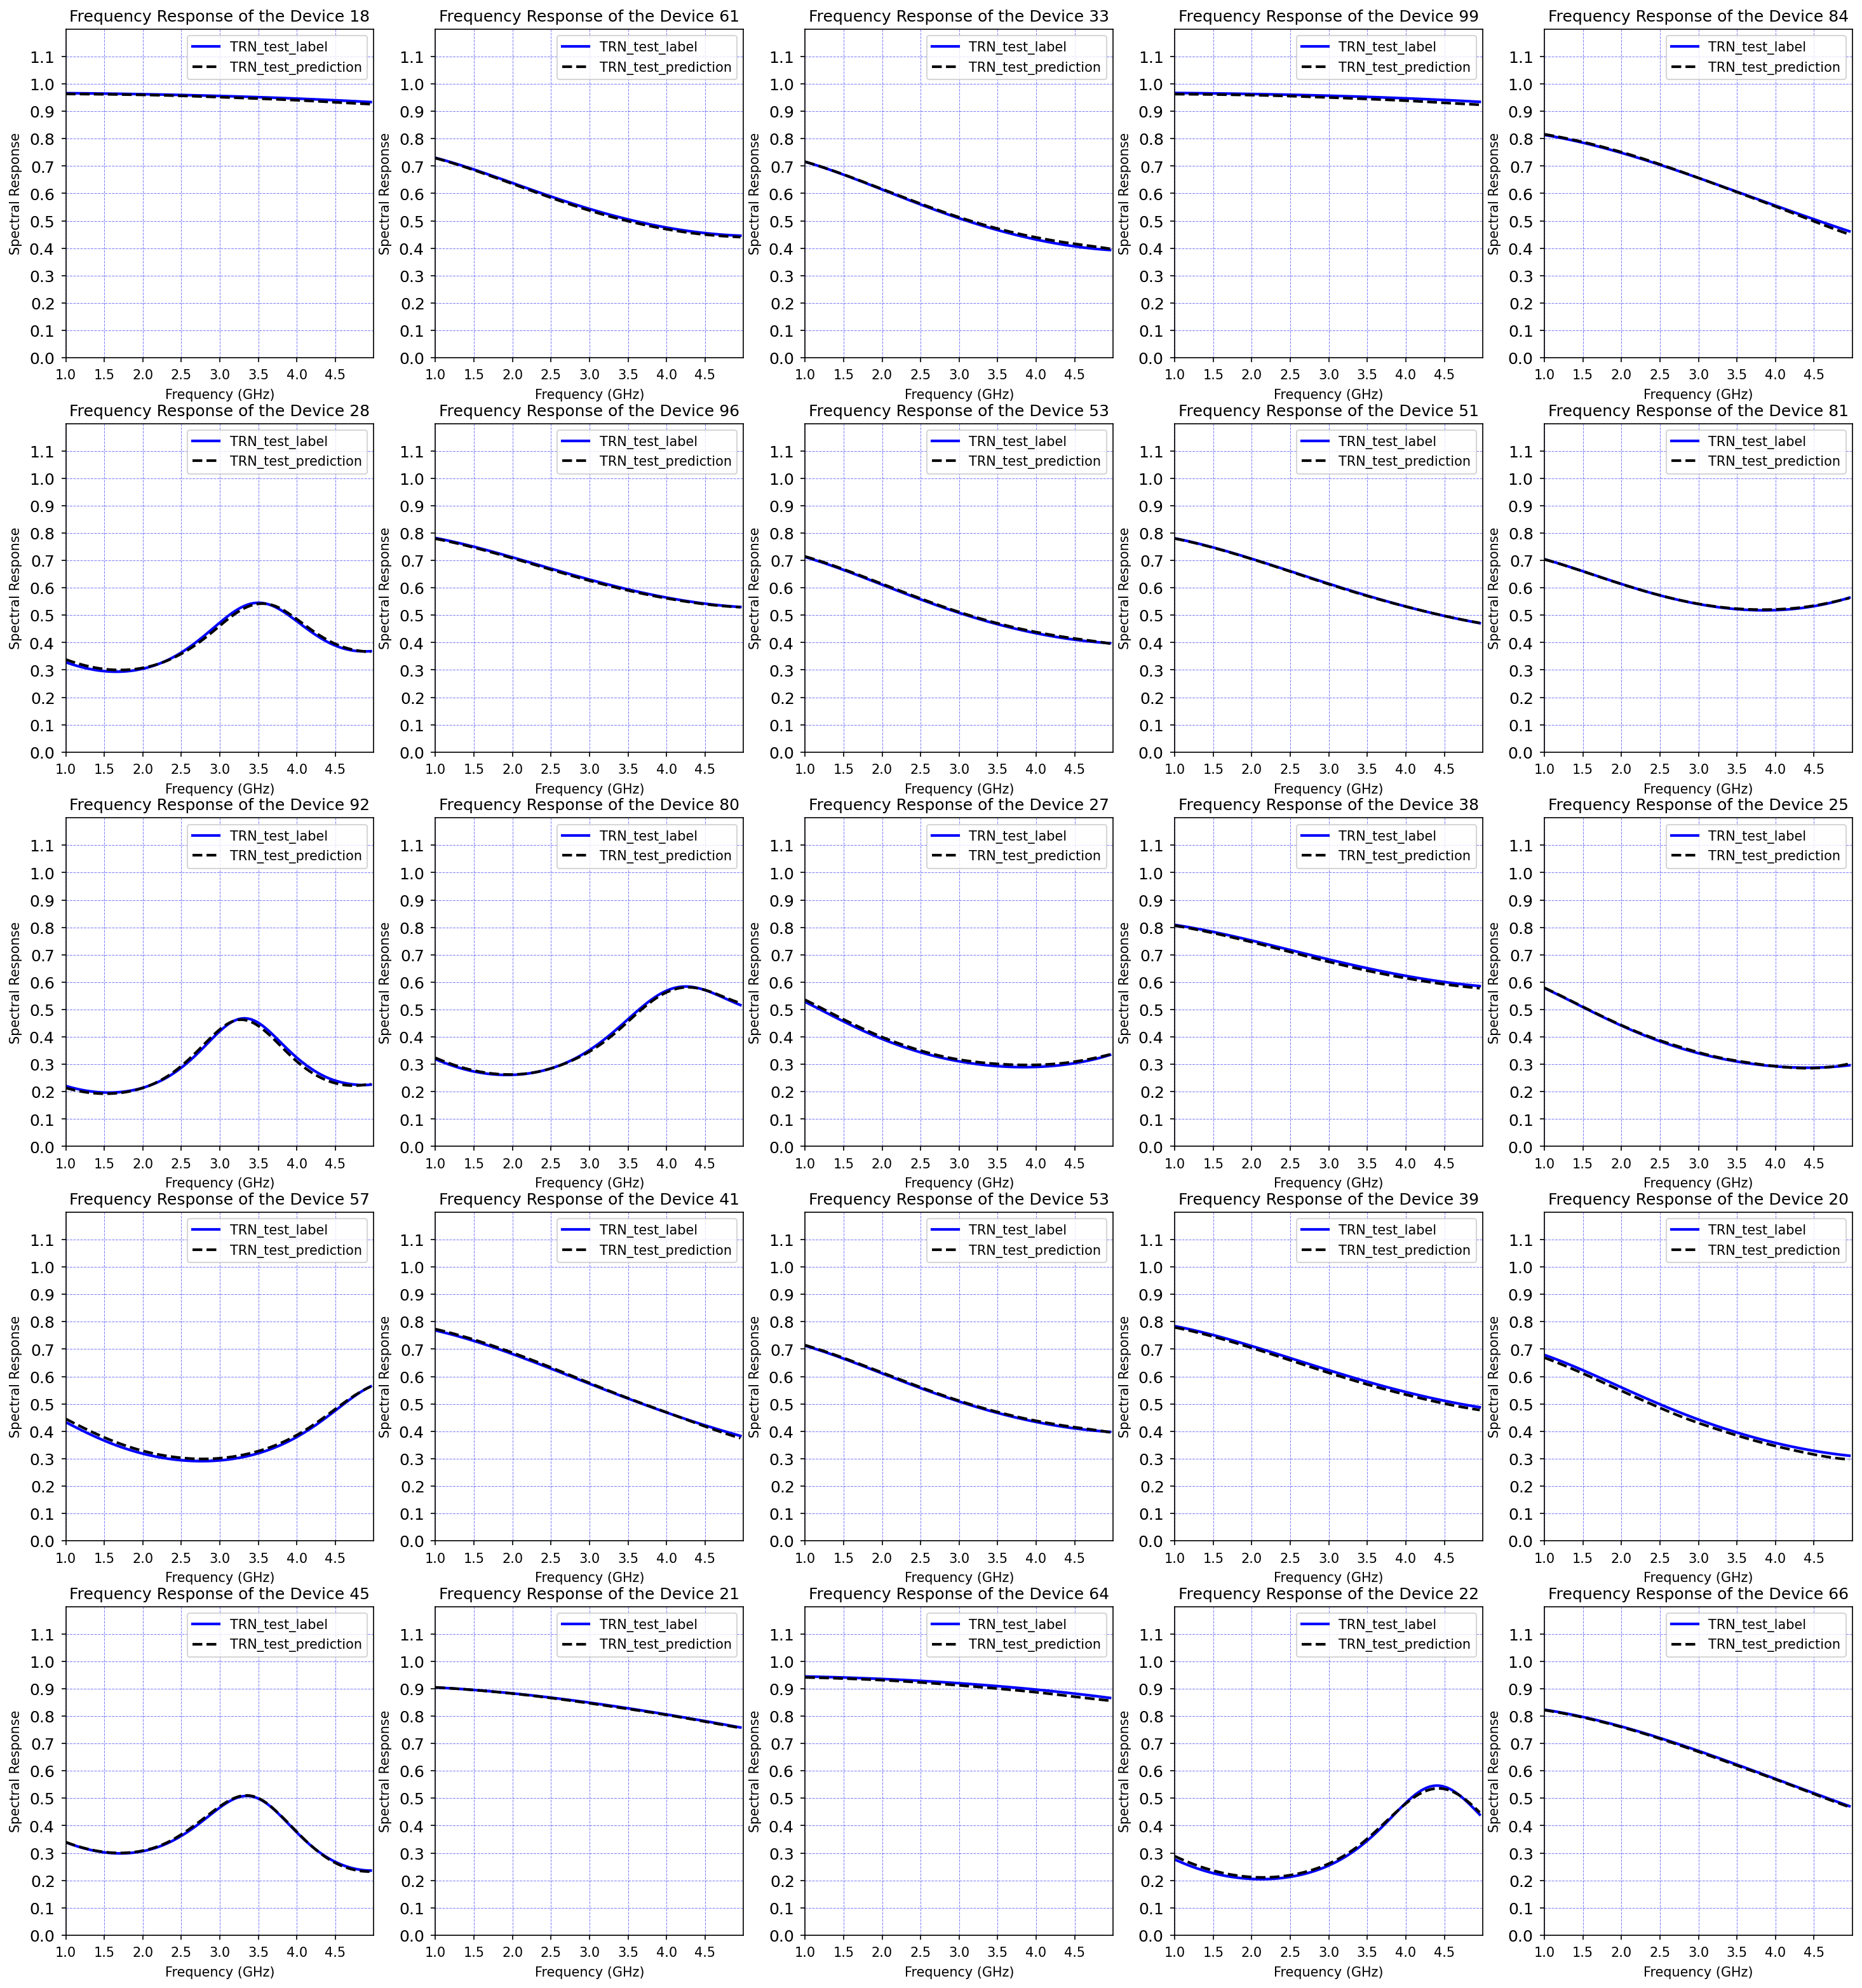

Number of seconds elapsed: 2.196084199997131 seconds
Number of minutes elapsed: 0.036601403333285515 minutes
Number of hours elapsed: 0.0006100233888880919 hours


In [261]:
################################################
## PLOTTING PREDICTIONS VS. TEST LABELS
################################################

start = timer()

plot_row    = 5
plot_column = 5

#subplots with confiugrable rows and columns, figure size and dots per inch
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row , ncols = plot_column, figsize = (25,25), dpi = 150, constrained_layout=True) 

for x_plot in range(plot_row):
  for y_plot in range(plot_column):

    #imageIndex = x_plot*(plot_row + y_plot)
   
    imageIndex = np.random.randint(len(spec_index_val))

    #Axis number spacing
    plt.rcParams['xtick.major.pad']=5
    plt.rcParams['ytick.major.pad']=5

    #Setting colors, linewidths, linetypes
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, Y_test[imageIndex,:], color ='blue'  , lw=2,  ls='-', label = 'TRN_test_label')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, Predictions_test[imageIndex,:], color ='black' , lw=2,  ls='--', label = 'TRN_test_prediction')

    #Axis label spacing
    #Axis label spacing
    axes[x_plot, y_plot].xaxis.labelpad = 5
    axes[x_plot, y_plot].yaxis.labelpad = 5

    #Legends, labels, and title
    axes[x_plot, y_plot].set_xlabel('Frequency (GHz)')
    axes[x_plot, y_plot].set_ylabel('Spectral Response')
    axes[x_plot, y_plot].set_title('Frequency Response of the Device ' + str(imageIndex+1))
    axes[x_plot, y_plot].legend(loc=1)

    #Plot range
    axes[x_plot, y_plot].set_ylim([0,1.2])
    axes[x_plot, y_plot].set_xlim([1,5])

    #Placement of ticks and custom tick labels

    axes[x_plot, y_plot].set_xticks(list(np.arange(1,5,0.5)))
    yticks = list(np.arange(0,1.2,0.1))
    axes[x_plot, y_plot].set_yticks(yticks)
    axes[x_plot, y_plot].set_yticklabels(["$ %.1f $" % y for y in yticks], fontsize = 12)

    #Axis position adjustments
    fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);

    #Axis Grid
    axes[x_plot, y_plot].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

    #Labels, Splines, and Tick Color
    color_type = 'black'
    axes[x_plot, y_plot].spines['bottom'].set_color(color_type)
    axes[x_plot, y_plot].spines['top'].set_color(color_type)
    axes[x_plot, y_plot].spines['left'].set_color(color_type)
    axes[x_plot, y_plot].spines['right'].set_color(color_type)
    axes[x_plot, y_plot].xaxis.label.set_color(color_type)
    axes[x_plot, y_plot].yaxis.label.set_color(color_type)
    axes[x_plot, y_plot].tick_params(axis='x', colors=color_type)
    axes[x_plot, y_plot].tick_params(axis='y', colors=color_type)

plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

In [242]:
################################################
## BULK TESTING PROCESS
################################################

In [262]:
################################################
## LOAD ENTIRE TEST DATASET
################################################

# I did not change the val_ and _val naming to test_ or _test due to laziness.
# Just take note that everything in this code is now related to the test set.


start = timer()

# def load_spectrum_dataset():
# Load the Dataset

#val_dataset  = h5py.File('test_set_100.h5', 'r')
val_dataset  = h5py.File('Responses_1329.h5', 'r')

# Extract the keys
keys           = list(val_dataset.keys())

# Separate the Materials and Spectrum Response Data
material_val       = val_dataset[keys[0]]
spectrum_val       = val_dataset[keys[1]]

# Get individual keys for materials and spectrum
keys_mat_val       = list(material_val.keys())
keys_spec_val      = list(spectrum_val.keys())

print(keys_mat_val)
print(keys_spec_val)

# Separate the components of material group
DEV_ER_mat_val     = material_val[keys_mat_val[0]]
DEV_SIG_mat_val    = material_val[keys_mat_val[1]]

# Separate the components of the spectrum group
A_spec_val         = spectrum_val[keys_spec_val[0]]
C_spec_val         = spectrum_val[keys_spec_val[1]]
R_spec_val         = spectrum_val[keys_spec_val[2]]
T_spec_val         = spectrum_val[keys_spec_val[3]]


# Testing for the accessibility of the data in the spectrum group
#print(A_spec['1'][:].reshape(1,100).squeeze())
#print(C_spec['1'][:].reshape(1,100).squeeze())
#print(R_spec['1'][:].reshape(1,100).squeeze())
#print(T_spec['1'][:].reshape(1,100).squeeze())
DEV_ER_mat_x_val = DEV_ER_mat_val['1'][:].reshape(128,128,1).shape[0]
DEV_ER_mat_y_val = DEV_ER_mat_val['1'][:].reshape(128,128,1).shape[1]

# Retriving a list for the total number of samples (HDF5 groups cannot be indexed easily)
sub_keys_spectrum_val = list(A_spec_val.keys())
spec_index_val        = [int(x) for x in sub_keys_spectrum_val]
#print(sorted(spec_index_val))
#print(len(spec_index_val))

# Prepare for the numpy data containers
DEV_ER_val    = np.zeros([len(spec_index_val), 128, 128, 1])
DEV_SIG_val   = np.zeros([len(spec_index_val), 128, 128, 1])
REF_val       = np.zeros([len(spec_index_val), 100])
TRN_val       = np.zeros([len(spec_index_val), 100])
ABS_val       = np.zeros([len(spec_index_val), 100])
CON_val       = np.zeros([len(spec_index_val), 100])

# Create a for loop to fill the numpy data containers from the HDF5 file containers

for i in range(len(spec_index_val)):
    DEV_ER_val[i, :, :,:]       = DEV_ER_mat_val[str(i)][:].reshape([DEV_ER_mat_x_val, DEV_ER_mat_y_val, 1])
    DEV_SIG_val[i, :, :,:]      = DEV_SIG_mat_val[str(i)][:].reshape([DEV_ER_mat_x_val, DEV_ER_mat_y_val, 1])
    REF_val[i, :]               = R_spec_val[str(i)][:].reshape(1,R_spec_val['1'][:].shape[0]).squeeze()
    TRN_val[i, :]               = T_spec_val[str(i)][:].reshape(1,T_spec_val['1'][:].shape[0]).squeeze()
    ABS_val[i, :]               = A_spec_val[str(i)][:].reshape(1,A_spec_val['1'][:].shape[0]).squeeze()
    CON_val[i, :]               = C_spec_val[str(i)][:].reshape(1,C_spec_val['1'][:].shape[0]).squeeze()
    
#return DEV_ER, DEV_SIG, REF, TRN, ABS, CON

print(REF_val[:].shape)
print(DEV_ER_val[:].shape)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

['DevER', 'DevSIG']
['A', 'C', 'R', 'T']
(1329, 100)
(1329, 128, 128, 1)
Number of seconds elapsed: 3.79890239998349 seconds
Number of minutes elapsed: 0.06331503999972483 minutes
Number of hours elapsed: 0.0010552506666620806 hours


C:\Users\admin\AppData\Local\Temp\ipykernel_44016\340159336.py:53: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);


<Figure size 432x288 with 0 Axes>

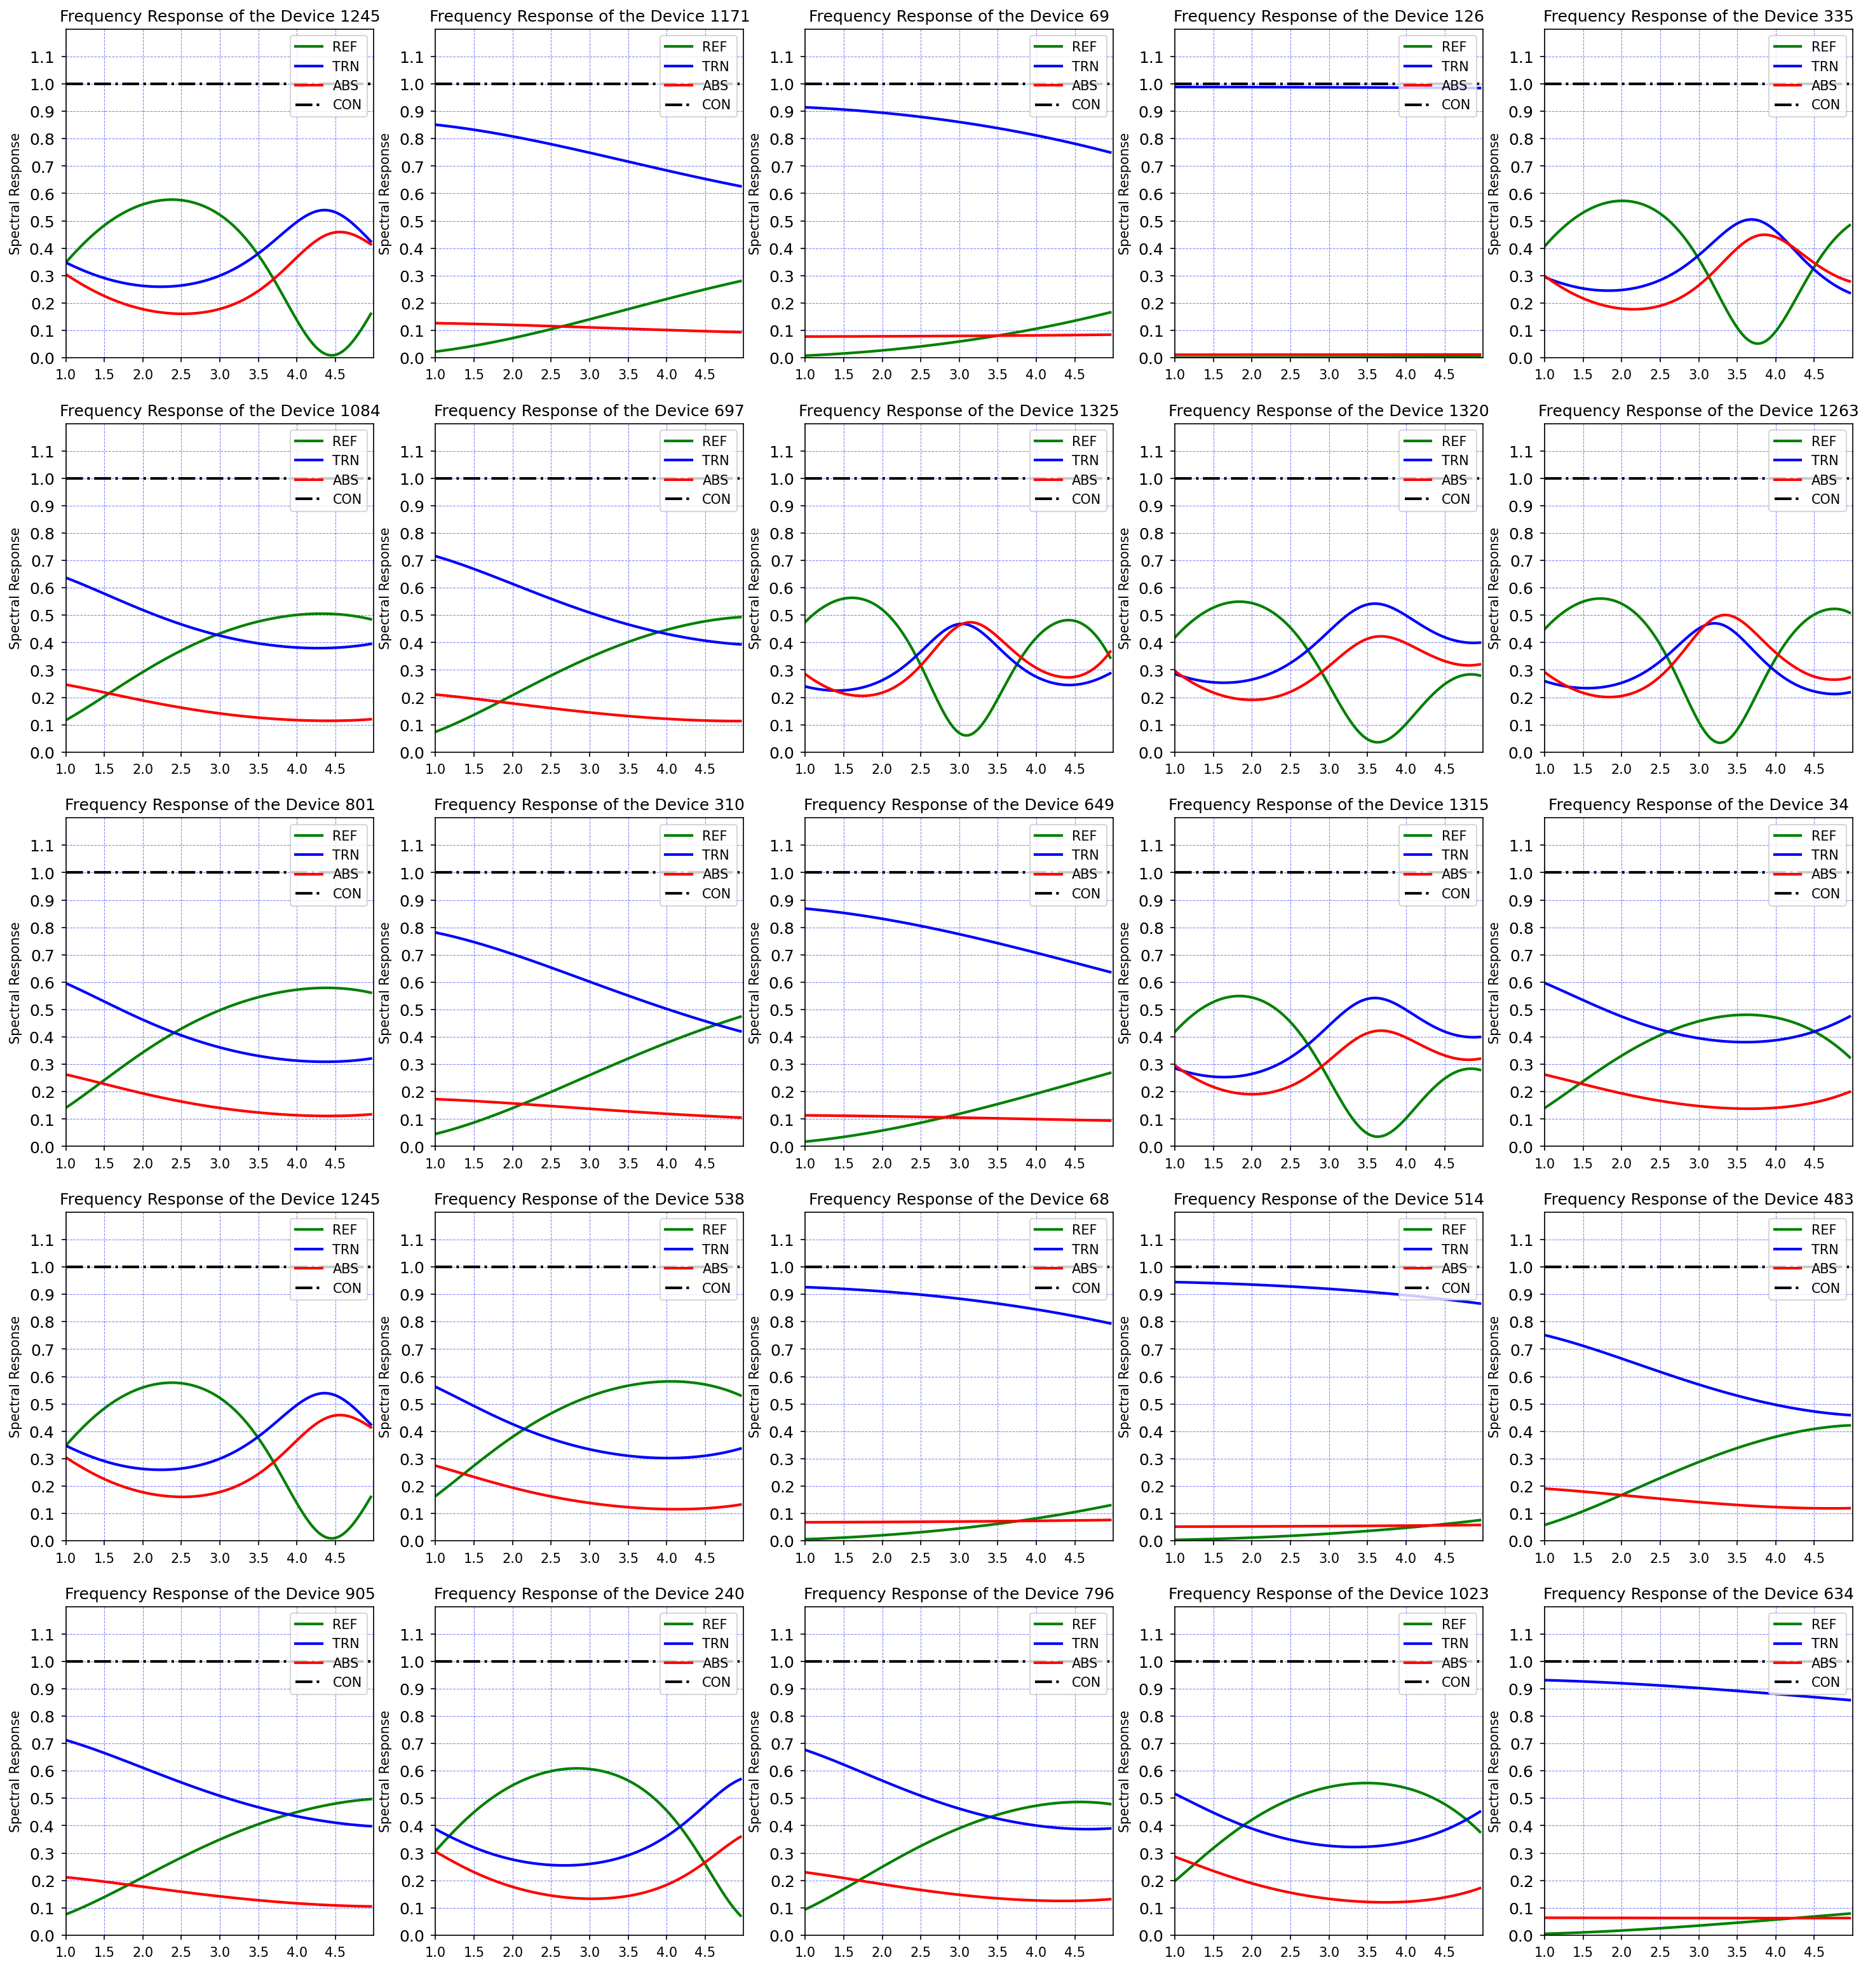

Number of seconds elapsed: 2.3795707000244875 seconds
Number of minutes elapsed: 0.03965951166707479 minutes
Number of hours elapsed: 0.0006609918611179132 hours


In [263]:
################################################
## PLOTTING FOR TEST/VALIDATION DATA SET
################################################

start = timer()

plot_row    = 5
plot_column = 5

#subplots with confiugrable rows and columns, figure size and dots per inch
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row , ncols = plot_column, figsize = (25,25), dpi = 150, constrained_layout=True) 

for x_plot in range(plot_row):
  for y_plot in range(plot_column):

    #imageIndex = x_plot*(plot_row + y_plot)
    imageIndex = np.random.randint(len(spec_index_val))

    #Axis number spacing
    plt.rcParams['xtick.major.pad']=5
    plt.rcParams['ytick.major.pad']=5

    #Setting colors, linewidths, linetypes
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, REF_val[imageIndex,:], color ='green'   , lw=2,  ls='-', label = 'REF')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, TRN_val[imageIndex,:], color ='blue'  , lw=2,  ls='-', label = 'TRN')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, ABS_val[imageIndex,:], color ='red' , lw=2,  ls='-', label = 'ABS')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, CON_val[imageIndex,:], color ='black' , lw=2,  ls='-.', label = 'CON')

    #Axis label spacing
    axes[x_plot, y_plot].xaxis.labelpad = 5
    axes[x_plot, y_plot].yaxis.labelpad = 5

    #Legends, labels, and title
    axes[x_plot, y_plot].set_xlabel('Frequency (GHz)')
    axes[x_plot, y_plot].set_ylabel('Spectral Response')
    axes[x_plot, y_plot].set_title('Frequency Response of the Device ' + str(imageIndex+1))
    axes[x_plot, y_plot].legend(loc=1)
    axes[x_plot, y_plot].xaxis.label.set_color('white')

    #Plot range
    axes[x_plot, y_plot].set_ylim([0,1.2])
    axes[x_plot, y_plot].set_xlim([1,5])

    #Placement of ticks and custom tick labels

    axes[x_plot, y_plot].set_xticks(list(np.arange(1,5,0.5)))
    yticks = list(np.arange(0,1.2,0.1))
    axes[x_plot, y_plot].set_yticks(yticks)
    axes[x_plot, y_plot].set_yticklabels(["$ %.1f $" % y for y in yticks], fontsize = 12)

    #Axis position adjustments
    fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);

    #Axis Grid
    axes[x_plot, y_plot].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)


plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

<Figure size 432x288 with 0 Axes>

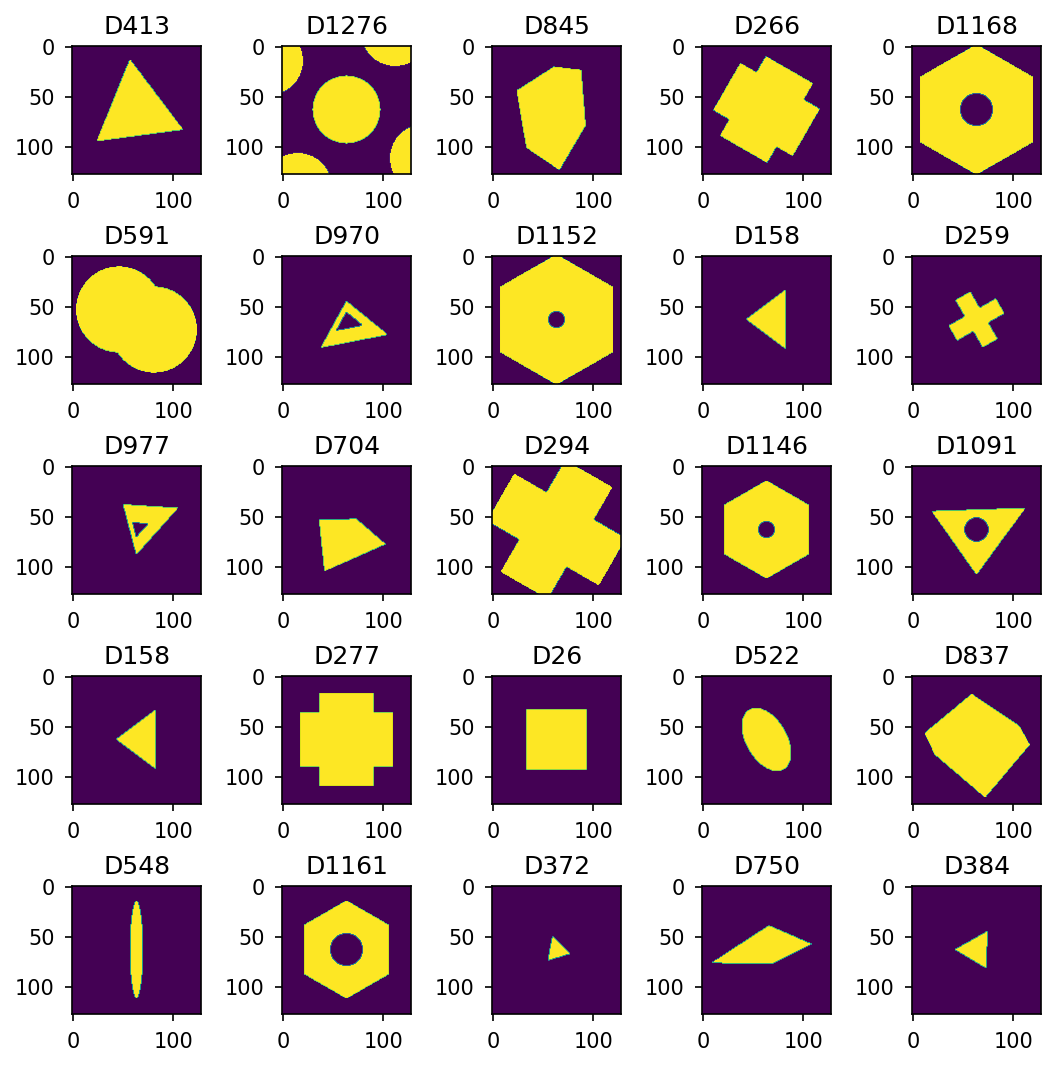

Number of seconds elapsed: 1.2038973000016995 seconds
Number of minutes elapsed: 0.020064955000028323 minutes
Number of hours elapsed: 0.00033441591666713875 hours


In [264]:
################################################
## DISPLAY IMAGE FOR TEST/VALIDATION DATA SET
################################################

start = timer()

plot_row = 5
plot_column = 5
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row, ncols = plot_column, figsize = (7,7), dpi = 150, constrained_layout=True) 

for x_plot in range(plot_row):
  for y_plot in range(plot_column):
    #imageIndex = x_plot*(plot_row + y_plot)
    imageIndex = np.random.randint(len(spec_index_val))
    axes[x_plot,y_plot].imshow(DEV_ER_val[imageIndex].reshape((DEV_ER_val.shape[1],DEV_ER.shape[1])).T) #display sample training image
    axes[x_plot,y_plot].set_title('D'+ str(imageIndex))
plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

In [265]:
################################################
## PREPARATION OF THE TEST FOR TRAINING
################################################

X_test = DEV_ER_val
Y_test = TRN_val

print ("number of test examples = " + str(X_test.shape[0]))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

print(Y_test)

number of test examples = 1329
X_test shape: (1329, 128, 128, 1)
Y_test shape: (1329, 100)
[[0.9677636  0.9676724  0.96757751 ... 0.9389171  0.93835822 0.93779235]
 [0.94658425 0.94636094 0.94612866 ... 0.87868634 0.87742144 0.87614257]
 [0.92549418 0.92509887 0.92468793 ... 0.8147542  0.81285256 0.81093532]
 ...
 [0.29009035 0.28579015 0.28167611 ... 0.4528015  0.44923971 0.44604409]
 [0.26114935 0.25777349 0.25462518 ... 0.35830472 0.3609048  0.36395067]
 [0.23420511 0.23163532 0.22932743 ... 0.25062838 0.2564384  0.26238472]]


In [266]:
################################################
## EVALUATE TEST DATA SET
################################################

start = timer()

if training_mode:
    Predictions_train = Spectral_Model.evaluate(X_test, Y_test)
else: 
    Predictions_train = reconstructed_model.evaluate(X_test,Y_test)

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

42/42 [==============================] - 2s 48ms/step - loss: 3.0685e-05 - accuracy: 0.8758
Number of seconds elapsed: 2.1151679000176955 seconds
Number of minutes elapsed: 0.03525279833362826 minutes
Number of hours elapsed: 0.0005875466388938043 hours


In [267]:
################################################
## PREDICT THE TEST/VALIDATION SETS
################################################

start = timer()

if training_mode:
    Predictions_test = Spectral_Model.predict(X_test)
else: 
    Predictions_test = reconstructed_model.predict(X_test)
print(Predictions_test[0])

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")

[0.96434945 0.9642803  0.9642098  0.9641339  0.9640577  0.9639723
 0.9638843  0.96379083 0.96369153 0.963585   0.9634759  0.9633626
 0.963246   0.9631216  0.962988   0.96285486 0.9627144  0.9625659
 0.9624153  0.9622585  0.9620922  0.9619177  0.9617407  0.961552
 0.9613567  0.9611603  0.9609459  0.9607298  0.9605002  0.9602651
 0.9600149  0.95976424 0.9594972  0.95923334 0.9589499  0.9586558
 0.95835197 0.9580439  0.95773286 0.95739883 0.9570588  0.95671475
 0.95635307 0.95599246 0.955618   0.9552364  0.954858   0.954476
 0.9540923  0.9537106  0.95332825 0.95294404 0.9525408  0.95215225
 0.95175004 0.95135003 0.95095146 0.9505451  0.95013654 0.94973433
 0.9493173  0.94889903 0.948493   0.9480791  0.9476494  0.9472321
 0.94681406 0.946398   0.9460566  0.94561964 0.945155   0.9446831
 0.9441914  0.943703   0.94325244 0.94273204 0.9422222  0.94168764
 0.9411573  0.94061345 0.9400655  0.93950224 0.93893117 0.9383671
 0.9377892  0.93718827 0.9365951  0.93587023 0.9353006  0.93472767
 0.9341

In [268]:
################################################
## COSINE SIMILARITY
################################################
Dat_A = Predictions_test
Dat_B = Y_test
cosSimScipy = []
cosSimNumpy = []
for item in range(Dat_A.shape[0]):
    # Solve for cosine similarity (scipy)
    cos_sim_scipy = 1 - spatial.distance.cosine(Dat_A[item], Dat_B[item])
    cosSimScipy.append(cos_sim_scipy)
    #print("Cosine Similarity using Scipy: " + str(cos_sim_scipy))

    # Solve for cosine similarity (numpy)
    cos_sim_numpy = dot(Dat_A[item], Dat_B[item])/(norm(Dat_A[item])*norm(Dat_B[item]))
    cosSimNumpy.append(cos_sim_numpy)
    #print("Cosine Similarity using Numpy: " + str(cos_sim_numpy))

print("Average Cosine Similarity using Scipy: ")
print(sum(cosSimScipy)/len(cosSimScipy))
print("Average Cosine Similarity using Numpy: ")
print(sum(cosSimNumpy)/len(cosSimNumpy))

Average Cosine Similarity using Scipy: 
0.999962256967342
Average Cosine Similarity using Numpy: 
0.9999622585216406


C:\Users\admin\AppData\Local\Temp\ipykernel_44016\3030093561.py:52: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);


<Figure size 432x288 with 0 Axes>

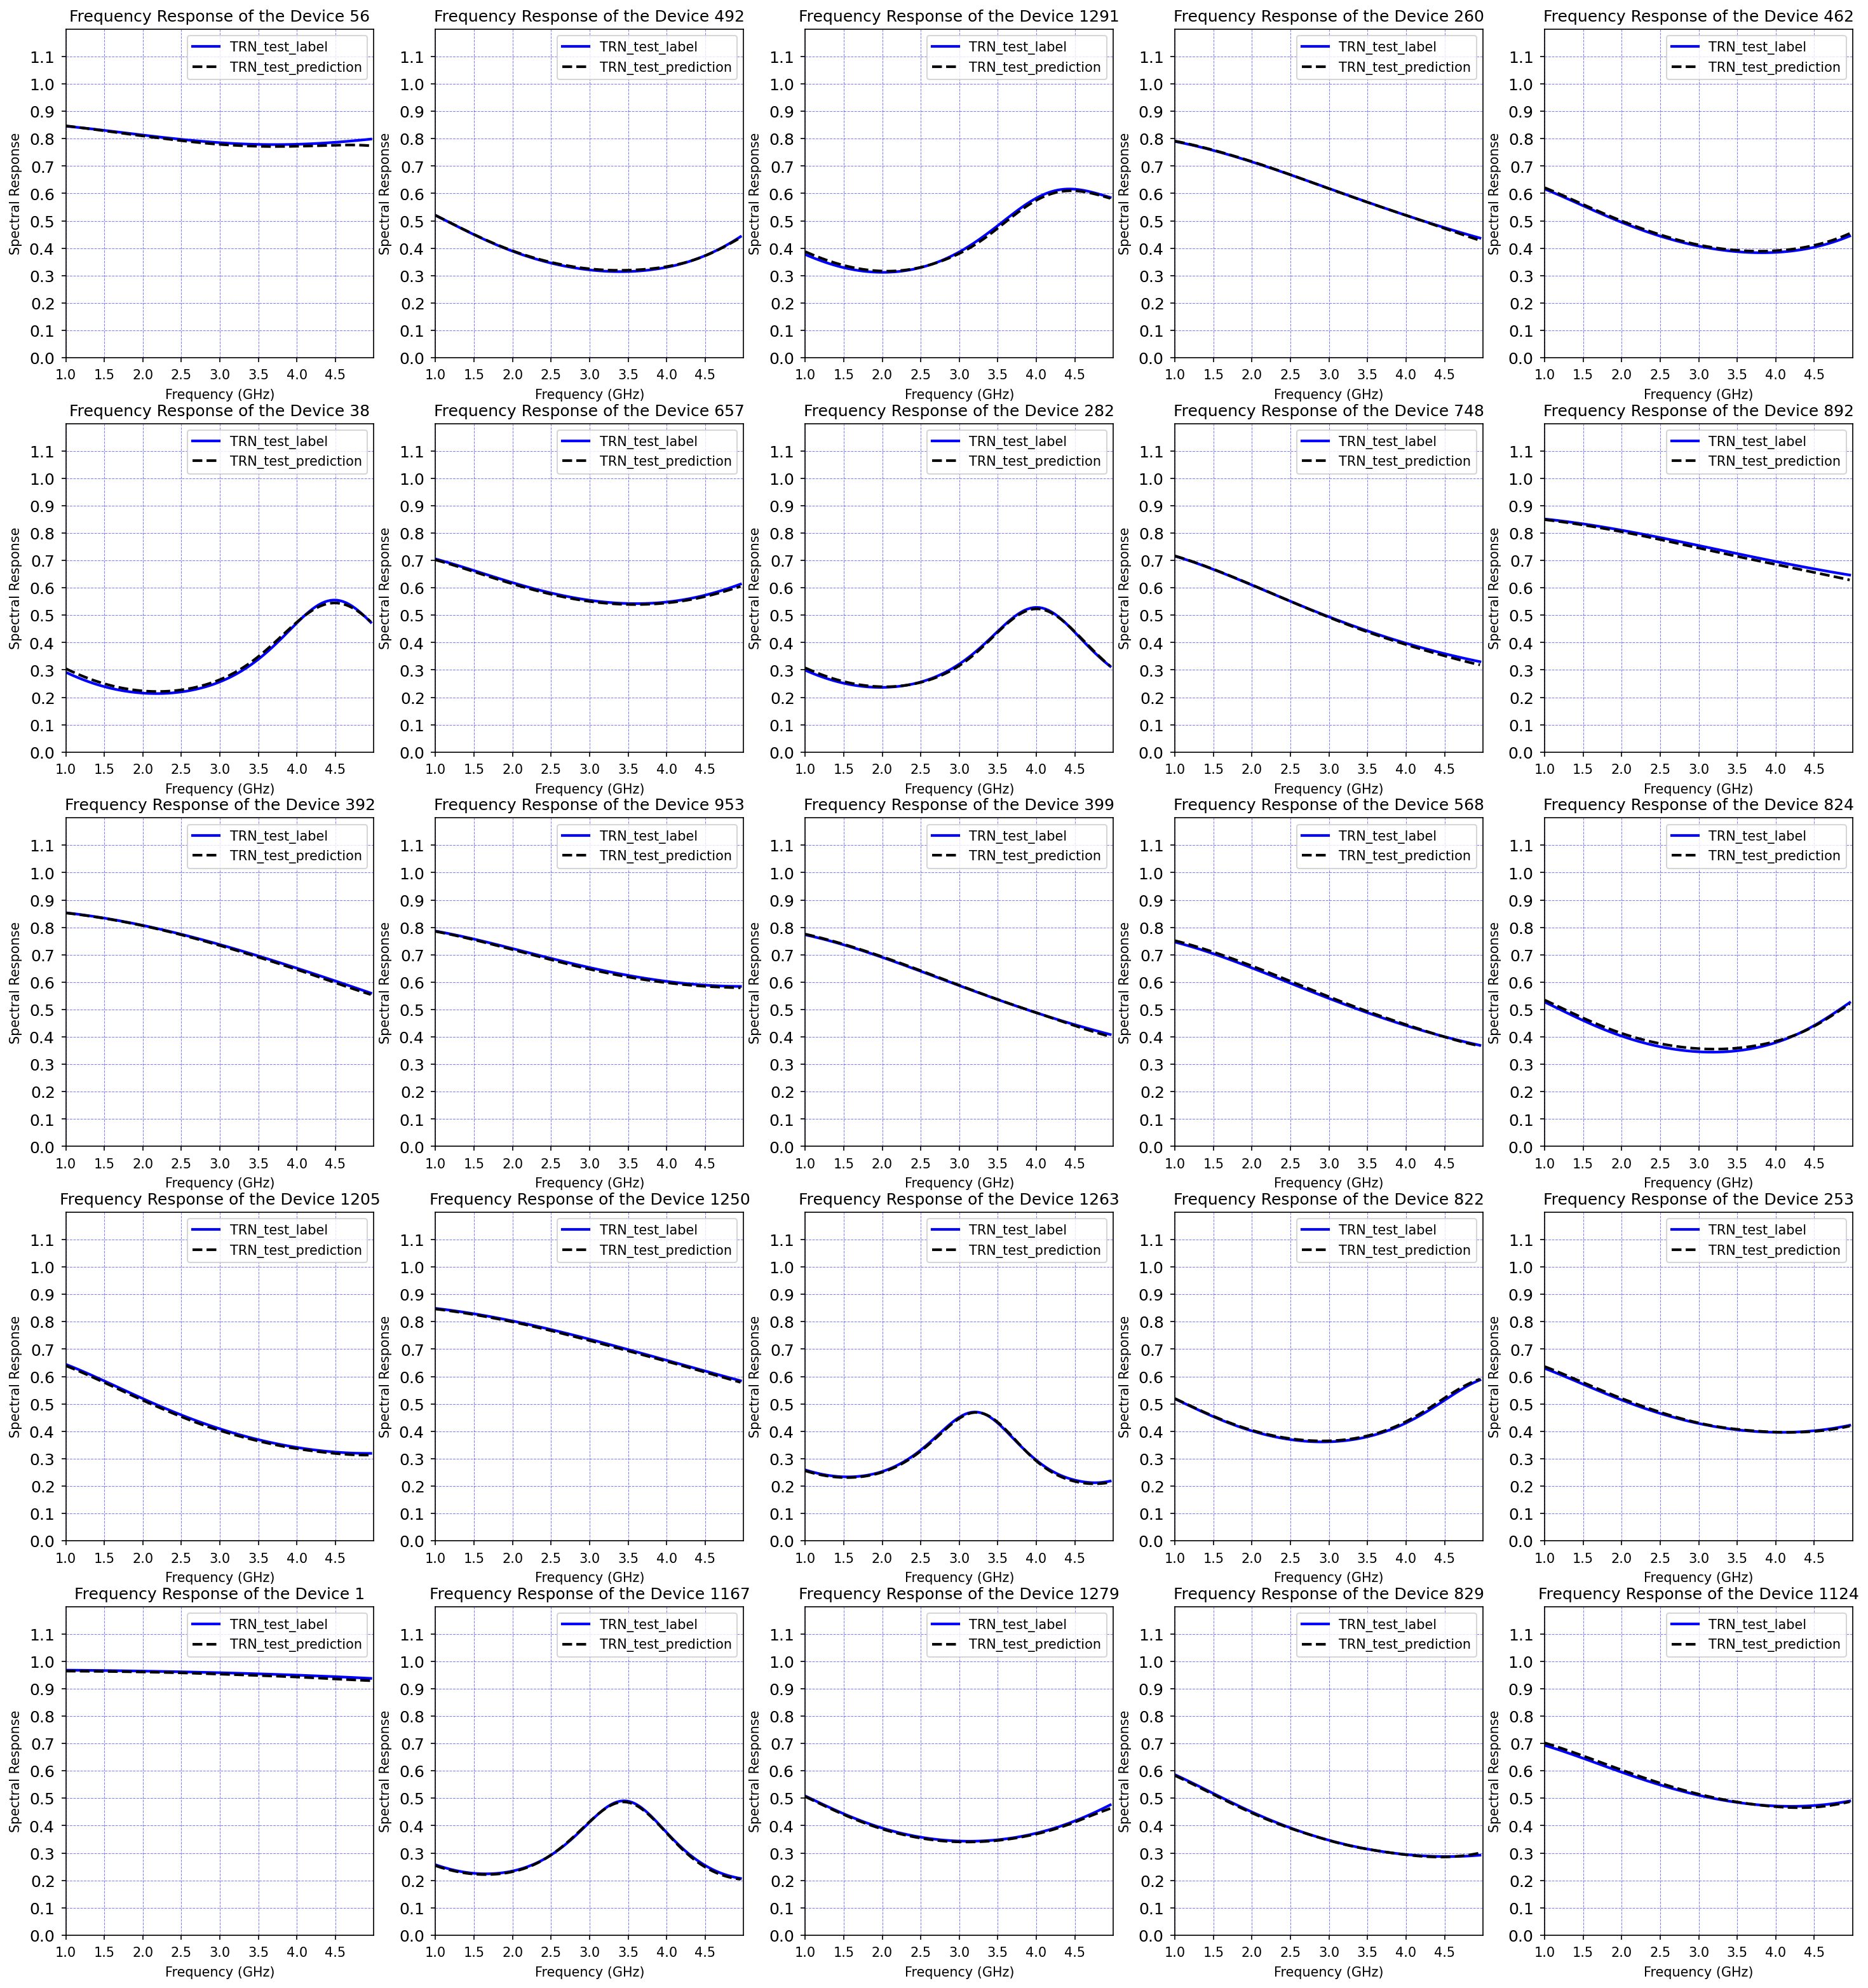

Number of seconds elapsed: 2.262721100007184 seconds
Number of minutes elapsed: 0.037712018333453064 minutes
Number of hours elapsed: 0.0006285336388908844 hours


In [269]:
################################################
## PLOTTING PREDICTIONS VS. TEST LABELS
################################################

start = timer()

plot_row    = 5
plot_column = 5

#subplots with confiugrable rows and columns, figure size and dots per inch
fig = plt.figure()
fig, axes = plt.subplots(nrows = plot_row , ncols = plot_column, figsize = (25,25), dpi = 150, constrained_layout=True) 

for x_plot in range(plot_row):
  for y_plot in range(plot_column):

    #imageIndex = x_plot*(plot_row + y_plot)
   
    imageIndex = np.random.randint(len(spec_index_val))

    #Axis number spacing
    plt.rcParams['xtick.major.pad']=5
    plt.rcParams['ytick.major.pad']=5

    #Setting colors, linewidths, linetypes
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, Y_test[imageIndex,:], color ='blue'  , lw=2,  ls='-', label = 'TRN_test_label')
    axes[x_plot, y_plot].plot(FREQ[0]/gigahertz, Predictions_test[imageIndex,:], color ='black' , lw=2,  ls='--', label = 'TRN_test_prediction')

    #Axis label spacing
    #Axis label spacing
    axes[x_plot, y_plot].xaxis.labelpad = 5
    axes[x_plot, y_plot].yaxis.labelpad = 5

    #Legends, labels, and title
    axes[x_plot, y_plot].set_xlabel('Frequency (GHz)')
    axes[x_plot, y_plot].set_ylabel('Spectral Response')
    axes[x_plot, y_plot].set_title('Frequency Response of the Device ' + str(imageIndex+1))
    axes[x_plot, y_plot].legend(loc=1)

    #Plot range
    axes[x_plot, y_plot].set_ylim([0,1.2])
    axes[x_plot, y_plot].set_xlim([1,5])

    #Placement of ticks and custom tick labels

    axes[x_plot, y_plot].set_xticks(list(np.arange(1,5,0.5)))
    yticks = list(np.arange(0,1.2,0.1))
    axes[x_plot, y_plot].set_yticks(yticks)
    axes[x_plot, y_plot].set_yticklabels(["$ %.1f $" % y for y in yticks], fontsize = 12)

    #Axis position adjustments
    fig.subplots_adjust(left=0.15, right=0.9,bottom=0.1,top=0.9);

    #Axis Grid
    axes[x_plot, y_plot].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

    #Labels, Splines, and Tick Color
    color_type = 'black'
    axes[x_plot, y_plot].spines['bottom'].set_color(color_type)
    axes[x_plot, y_plot].spines['top'].set_color(color_type)
    axes[x_plot, y_plot].spines['left'].set_color(color_type)
    axes[x_plot, y_plot].spines['right'].set_color(color_type)
    axes[x_plot, y_plot].xaxis.label.set_color(color_type)
    axes[x_plot, y_plot].yaxis.label.set_color(color_type)
    axes[x_plot, y_plot].tick_params(axis='x', colors=color_type)
    axes[x_plot, y_plot].tick_params(axis='y', colors=color_type)

plt.show()

end = timer()
print("Number of seconds elapsed: " + str(end - start) + " seconds")
print("Number of minutes elapsed: " + str((end - start)/60) + " minutes")
print("Number of hours elapsed: " + str((end - start)/60/60) + " hours")